# Setup Library

In [ ]:
!pip install git+https://github.com/tagucci/pythonrouge.git
!apt-get install -y cpanminus
!cpanm --force XML::Parser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tagucci/pythonrouge.git to /tmp/pip-req-build-2faz8b5l
  Running command git clone -q https://github.com/tagucci/pythonrouge.git /tmp/pip-req-build-2faz8b5l
  Created wheel for pythonrouge: filename=pythonrouge-0.2-py3-none-any.whl size=285408 sha256=653f58c27c9efcaed30341c98394f31814544765f431785e57063f47c79de5f0
  Stored in directory: /tmp/pip-ephem-wheel-cache-9jp98gtd/wheels/f2/28/1a/47e2c73d5e7d1d49296a991e19d774c97e4c2e98dbf027a515
Successfully built pythonrouge
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libalgorithm-c3-perl libb-hooks-endofscope-perl libb-hooks-op-check-perl
  libclass-c3-perl libclass-c3-xs-perl l

In [ ]:
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
nltk.download('punkt')
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Preprocessing Data

In [ ]:
def unlistDatasetParagraphs(df, column: str):
  data = []
  for list1 in df[column]:
    new_paragraphs = ''
    for list2 in list1:
      for list3 in list2:
        for str1 in list3:
          new_paragraphs += " " + str1
    data.append(new_paragraphs)

  df[column] = data
  pass

In [ ]:
def unlistDatasetSummary(df, column: str):
  data = []
  for list1 in df[column]:
    new_paragraphs = ''
    for list2 in list1:
      for str1 in list2:
        new_paragraphs += " " + str1
    data.append(new_paragraphs)

  df[column] = data
  pass

In [ ]:
def caseFolding (df, column:str):
  data = []
  for kalimat in df[column]:
    data.append(kalimat.lower())
  
  df[column] = data
  pass

In [ ]:
def removingPunctuation(df, column:str):

  data = []
  for kalimat in df[column]:
    new_kalimat = kalimat.translate(str.maketrans('', '', string.punctuation))
    data.append(new_kalimat)

  df[column] = data
  pass

In [ ]:
def wordTokenization(df, column:str):
  data = []
  for kalimat in df[column]:
    nltk_tokens = nltk.word_tokenize(kalimat)
    data.append(nltk_tokens)

  df[column] = data
  pass

In [ ]:
def addStartEnd(df, column: str):
  data = []
  for summary in df[column]:
    summary.append('</s>')
    summary.insert(0, '<s>')
    data.append(summary)

  df[column] = data
  pass

In [ ]:
def shortText(df):

  cleaned_paragraphs = np.array(df['clean_paragraphs'])
  cleaned_summary= np.array(df['clean_summary'])

  short_paragraphs = []
  short_summary = []

  for i in range(len(cleaned_paragraphs)):
    if len(cleaned_summary[i]) <= max_summary_len and len(cleaned_paragraphs[i]) <= max_paragraphs_len: 
      short_paragraphs.append(cleaned_paragraphs[i])
      short_summary.append(cleaned_summary[i])
        
  post_df = pd.DataFrame({'paragraphs': short_paragraphs,'summary': short_summary})
  return post_df

In [ ]:
def showMax(df):
  text_count = []
  summary_count = []

  for sent in df['clean_paragraphs']:
      text_count.append(len(sent))
      
  for sent in df['clean_summary']:
      summary_count.append(len(sent))

  graph_df = pd.DataFrame() 

  graph_df['text'] = text_count
  graph_df['summary'] = summary_count

  graph_df.hist(bins = 5)
  plt.show()

  pass

In [ ]:
train1 = pd.read_json(path_or_buf=r'/content/drive/MyDrive/Dataset TA/train.01.jsonl', lines=True)
train2 = pd.read_json(path_or_buf=r'/content/drive/MyDrive/Dataset TA/train.02.jsonl', lines=True)
train3 = pd.read_json(path_or_buf=r'/content/drive/MyDrive/Dataset TA/train.03.jsonl', lines=True)
train4 = pd.read_json(path_or_buf=r'/content/drive/MyDrive/Dataset TA/train.04.jsonl', lines=True)
train5 = pd.read_json(path_or_buf=r'/content/drive/MyDrive/Dataset TA/train.05.jsonl', lines=True)

In [ ]:
full_train = pd.concat([train1, train2, train3, train4, train5], ignore_index=True)
full_train

,category,gold_labels,id,paragraphs,source,source_url,summary
0,tajuk utama,"[[False, True], [True, True], [False, False, F...",1501893029-lula-kamal-dokter-ryan-thamrin-saki...,"[[[Jakarta, ,, CNN, Indonesia, -, -, Dokter, R...",cnn indonesia,https://www.cnnindonesia.com/hiburan/201708041...,"[[Dokter, Lula, Kamal, yang, merupakan, selebr..."
1,teknologi,"[[False, False, False, False], [False, True, T...",1509072914-dua-smartphone-zenfone-baru-tawarka...,"[[[Selfie, ialah, salah, satu, tema, terpanas,...",dailysocial.id,https://dailysocial.id/post/dua-smartphone-zen...,"[[Asus, memperkenalkan, , ZenFone, generasi, ..."
2,hiburan,"[[True], [True], [False, False], [False], [Fal...",1510613677-songsong-visit-2020-bengkulu-perkua...,"[[[Jakarta, ,, CNN, Indonesia, -, -, Dinas, Pa...",cnn indonesia,https://www.cnnindonesia.com/gaya-hidup/201711...,"[[Dinas, Pariwisata, Provinsi, Bengkulu, kemba..."
3,tajuk utama,"[[True, True], [False, False, False], [True], ...",1502706803-icw-ada-kejanggalan-atas-tewasnya-s...,"[[[Merdeka.com, -, Indonesia, Corruption, Watc...",merdeka,https://www.merdeka.com/peristiwa/icw-merasa-a...,"[[Indonesia, Corruption, Watch, (, ICW, ), mem..."
4,tajuk utama,"[[False, True], [True, True, True], [False], [...",1503039338-pembagian-sepeda-usai-upacara-penur...,"[[[Merdeka.com, -, Presiden, Joko, Widodo, (, ...",merdeka,https://www.merdeka.com/peristiwa/usai-upacara...,"[[Jokowi, memimpin, upacara, penurunan, bender..."
...,...,...,...,...,...,...,...
71348,tajuk utama,"[[True], [True, True], [True, False], [False, ...",1494387000-bongkar-pungli-rutan-bungkuk-polisi...,"[[[Merdeka.com, -, Direktorat, Reserse, Krimin...",merdeka,https://www.merdeka.com/peristiwa/bongkar-pung...,"[[Direktorat, Reserse, Kriminal, Khususnya, Po..."
71349,tajuk utama,"[[True, True], [False, False], [False, False],...",1503822625-implementasi-het-beras-kementan-pun...,"[[[Merdeka.com, -, Kementerian, Perdagangan, t...",merdeka,https://www.merdeka.com/uang/implementasi-het-...,"[[Kementerian, Perdagangan, telah, menetapkan,..."
71350,tajuk utama,"[[True, True], [True, False], [False], [False]]",1491261317-menhub-panggil-manajemen-lion-air,"[[[Rimanews, -, Menteri, Perhubungan, Budi, Ka...",rimanews,http://rimanews.com/nasional/peristiwa/read/20...,"[[Menteri, Perhubungan, Budi, Karya, Sumadi, a..."
71351,olahraga,"[[True], [True, True], [False], [False], [Fals...",1502994600-conor-mcgregor-lebih-siap-daripada-...,"[[[JUARA.net, -, Duel, antara, Floyd, Mayweath...",juara.net,http://juara.bolasport.com/read/ragam/ragam/18...,"[[Sejumlah, persipan, jelang, duel, antara, Fl..."


In [ ]:
test1 = pd.read_json(path_or_buf=r'/content/drive/MyDrive/Dataset TA/test.01.jsonl', lines=True)
test2 = pd.read_json(path_or_buf=r'/content/drive/MyDrive/Dataset TA/test.02.jsonl', lines=True)
test3 = pd.read_json(path_or_buf=r'/content/drive/MyDrive/Dataset TA/test.03.jsonl', lines=True)
test4 = pd.read_json(path_or_buf=r'/content/drive/MyDrive/Dataset TA/test.04.jsonl', lines=True)
test5 = pd.read_json(path_or_buf=r'/content/drive/MyDrive/Dataset TA/test.05.jsonl', lines=True)

In [ ]:
full_test = pd.concat([test1, test2, test3, test4, test5], ignore_index=True)
full_test

,category,gold_labels,id,paragraphs,source,source_url,summary
0,hiburan,"[[False], [True], [False], [True, False], [Fal...",1494135000-wanita-terberat-di-dunia-jalani-fis...,"[[[Jakarta, ,, CNN, Indonesia, -, -, Dilansir,...",cnn indonesia,http://www.cnnindonesia.com/gaya-hidup/2017050...,"[[Eman, Ahmed, Abd, El, Aty, memiliki, berat, ..."
1,tajuk utama,"[[True, True], [True, True, True], [False, Fal...",1501222980-kemhan-ingin-beli-drone-dari-china-...,"[[[Menteri, Pertahanan, Ryamizard, Ryacudu, me...",kumparan,https://kumparan.com/teuku-muhammad-valdy-arie...,"[[Menteri, Pertahanan, Ryamizard, Ryacudu, men..."
2,showbiz,"[[True], [True], [False], [True], [False], [Fa...",1475739008-film-mean-girls-akan-dibuat-musikal,"[[[Jakarta, ,, CNN, Indonesia, -, -, Meski, su...",cnn indonesia,http://www.cnnindonesia.com/hiburan/2016100514...,"[[Rumah, produksi, film, yang, dibintangi, Lin..."
3,tajuk utama,"[[True, True], [False], [False, False], [False...",1505785500-eggi-sudjana-sumpah-demi-allah-saya...,"[[[Usai, melaksanakan, ibadah, haji, ,, Eggi, ...",kumparan,https://kumparan.com/rini-friastuti/eggi-sudja...,"[[Eggi, Sudjana, akhirnya, mendatangi, kantor,..."
4,teknologi,"[[False, False, True], [True, True], [False, F...",1497394800-kartu-muslim-optimalkan-teknologi-ar,"[[[Banyak, cara, untuk, memberikan, pengajaran...",dailysocial.id,https://dailysocial.id/post/kartu-muslim-optim...,"[[Game, permainan, Kartu, Muslim, .], [Menggun..."
...,...,...,...,...,...,...,...
18769,tajuk utama,"[[True, False], [False, False], [True], [True]...",1519195500-persiapan-pilpres-zulkifli-hasan-te...,"[[[Suara.com, -, Ketua, Umum, DPP, Partai, Ama...",suara,https://www.suara.com/news/2018/02/20/183814/p...,"[[Ketua, Umum, DPP, Partai, Amanat, Nasional, ..."
18770,olahraga,"[[True, True], [False, False], [True, True], [...",1518206400-andik-vermansah-diklaim-resmi-gabun...,"[[[Jakarta, ,, CNN, Indonesia, -, -, Winger, T...",cnn indonesia,https://www.cnnindonesia.com/olahraga/20180209...,"[[Winger, Timnas, Indonesia, ,, Andik, Vermans..."
18771,teknologi,"[[False, True, True, False, False], [False], [...",1501214400-kaskus-kini-fokus-ke-pengembangan-p...,"[[[Sebagai, seorang, pengguna, Kaskus, yang, p...",dailysocial.id,https://dailysocial.id/post/inovasi-kaskus-kin...,"[[Kaskus, saat, ini, sudah, jauh, berbeda, kar..."
18772,tajuk utama,"[[True, True], [True, True], [True], [False], ...",1500930900-kebakaran-hutan-dan-lahan-kabut-asa...,"[[[Jakarta, ,, CNN, Indonesia, -, -, Kabut, as...",cnn indonesia,https://www.cnnindonesia.com/nasional/20170724...,"[[Kabut, asap, menyelimuti, Kota, Meulaboh, ,,..."


In [ ]:
dev1 = pd.read_json(path_or_buf='/content/drive/MyDrive/Dataset TA/dev.01.jsonl', lines=True)
dev2 = pd.read_json(path_or_buf='/content/drive/MyDrive/Dataset TA/dev.02.jsonl', lines=True)
dev3 = pd.read_json(path_or_buf='/content/drive/MyDrive/Dataset TA/dev.03.jsonl', lines=True)
dev4 = pd.read_json(path_or_buf='/content/drive/MyDrive/Dataset TA/dev.04.jsonl', lines=True)
dev5 = pd.read_json(path_or_buf='/content/drive/MyDrive/Dataset TA/dev.05.jsonl', lines=True)

In [ ]:
full_dev = pd.concat([dev1, dev2, dev3, dev4, dev5], ignore_index=True)
full_dev

,category,gold_labels,id,paragraphs,source,source_url,summary
0,tajuk utama,"[[True, True], [True], [False, False, False], ...",1490674536-mustahil-transportasi-tradisional-d...,"[[[Ketua, MPR, Zulkifli, Hasan, menyesalkan, k...",kumparan,https://kumparan.com/ananda-wardhiati-teresia/...,"[[Ketua, MPR, Zulkifli, Hasan, menyesalkan, ki..."
1,showbiz,"[[True, True], [False], [False, False], [True,...",1504900800-bocor-james-bond-nikah-di-sekuel-te...,"[[[Suara.com, -, Cerita, sekuel, terbaru, Jame...",suara,http://www.suara.com/entertainment/2017/09/06/...,"[[Cerita, sekuel, terbaru, James, Bond, bocor,..."
2,tajuk utama,"[[True, False], [True, True], [False, False, F...",1489536002-mentan-lepas-ekspor-perdana-daging-...,"[[[Menteri, Pertanian, Andi, Amran, Sulaiman, ...",suara,http://www.suara.com/bisnis/2017/03/13/201620/...,"[[Saat, ini, pemerintah, terus, meningkatkan, ..."
3,olahraga,"[[True, True], [False, False, False, False], [...",1514112565-hasil-real-madrid-vs-barcelona,"[[[SPANYOL, –, Barcelona, berhasil, memboyong,...",poskotanews,http://poskotanews.com/2017/12/23/kalahkan-rea...,"[[Barcelona, berhasil, memboyong, kemenangan, ..."
4,hiburan,"[[True], [True], [False]]",1508483400-jayawijaya-datangkan-arkeolog-untuk...,"[[[Wamena, (, ANTARA, News, ), -, Pemerintah, ...",antaranews,http://www.antaranews.com/berita/659644/jayawi...,"[[Pemerintah, Kabupaten, Jayawijaya, ,, Papua,..."
...,...,...,...,...,...,...,...
3738,tajuk utama,"[[True, True], [False], [False], [True], [Fals...",1498371300-dapat-remisi-382-narapidana-bebas-s...,"[[[Jakarta, ,, CNN, Indonesia, -, -, Total, 38...",cnn indonesia,http://www.cnnindonesia.com/nasional/201706241...,"[[Total, 382, narapidana, beragama, Islam, beb..."
3739,tajuk utama,"[[True], [True], [True], [False], [False, Fals...",1509745710-jokowi-tagih-janji-kapolri-tuntaska...,"[[[Jakarta, ,, CNN, Indonesia, -, -, Presiden,...",cnn indonesia,https://www.cnnindonesia.com/nasional/20171103...,"[[Presiden, Joko, Widodo, akan, kembali, mengu..."
3740,teknologi,"[[True, False, True], [True, False], [False, F...",1501649557-microsoft-pensiunkan-aplikasi-word-...,"[[[Tahun, lalu, Microsoft, meramaikan, persain...",dailysocial.id,https://dailysocial.id/post/microsoft-word-flow,"[[Tahun, lalu, Microsoft, meramaikan, persaing..."
3741,tajuk utama,"[[True], [False, False], [True], [False, False...",1518152939-luhut-janjikan-pembebasan-lahan-ker...,"[[[Suara.com, -, Menteri, Koordinator, Bidang,...",suara,https://www.suara.com/news/2018/02/08/140348/l...,"[[ , Menteri, Koordinator, Bidang, Kemaritiman..."


In [ ]:
full_dataset = pd.concat([full_dev, full_train, full_test], ignore_index=True)

In [ ]:
full_dataset = full_dataset[full_dataset.category == 'teknologi']

In [ ]:
full_dataset = full_dataset.reset_index(drop=True)

In [ ]:
full_dataset_unlist = full_dataset.copy()
unlistDatasetParagraphs(full_dataset_unlist, 'paragraphs')
unlistDatasetSummary(full_dataset_unlist, 'summary')
full_dataset['clean_paragraphs'] = full_dataset_unlist['paragraphs']
full_dataset['clean_summary'] = full_dataset_unlist['summary']
caseFolding(full_dataset, 'clean_paragraphs')
caseFolding(full_dataset, 'clean_summary')
removingPunctuation(full_dataset, 'clean_paragraphs')
removingPunctuation(full_dataset, 'clean_summary')

In [ ]:
wordTokenization(full_dataset, 'clean_paragraphs')
wordTokenization(full_dataset, 'clean_summary')

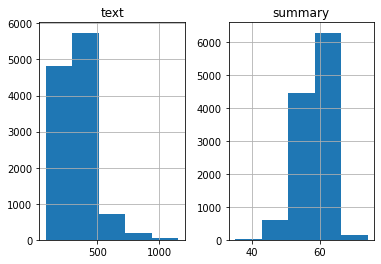

In [ ]:
showMax(full_dataset)

In [ ]:
# Check how much % of text have 0-500 words
cnt = 0
for i in full_dataset['clean_paragraphs']:
    if len(i) <= 500:
        cnt = cnt + 1
print(cnt / len(full_dataset['clean_paragraphs']))

0.9099435518888407


In [ ]:
# Check how much % of text have 0-70 words
cnt = 0
for i in full_dataset['clean_summary']:
    if len(i) <= 65:
        cnt = cnt + 1
print(cnt / len(full_dataset['clean_summary']))

0.9795918367346939


In [ ]:
max_paragraphs_len = 500
max_summary_len = 65

In [ ]:
addStartEnd(full_dataset, 'clean_summary')

In [ ]:
post_full = shortText(full_dataset)

In [ ]:
post_full = post_full.head(10000)

In [ ]:
post_full

,paragraphs,summary
0,"[ada, yang, baru, dari, google, calendar, vers...","[<s>, tampilan, dari, google, calendar, versi,..."
1,"[berdiri, sejak, juli, 2016, platform, direkto...","[<s>, gotomalls, mengklaim, sudah, menjalin, k..."
2,"[awalnya, hanya, tersedia, di, platform, windo...","[<s>, anda, kini, dapat, menghubungkan, cortan..."
3,"[tren, kerja, remote, tidak, ngantor, setiap, ...","[<s>, salah, satu, startup, yang, sedang, meng..."
4,"[pt, suzuki, indomobil, sales, sis, divisi, ro...","[<s>, pt, suzuki, indomobil, sales, sis, divis..."
...,...,...
9832,"[ada, yang, baru, dari, google, calendar, vers...","[<s>, tampilan, dari, google, calendar, versi,..."
9833,"[pebisnis, startup, selalu, melihat, peluang, ...","[<s>, newsfeeding, bekerja, dengan, menawarkan..."
9834,"[lomography, kembali, hadir, dengan, kamera, i...","[<s>, lomography, kembali, hadir, dengan, kame..."
9835,"[sebagai, seorang, pengguna, kaskus, yang, per...","[<s>, kaskus, saat, ini, sudah, jauh, berbeda,..."


# Fit Sequence

In [ ]:
from sklearn.model_selection import train_test_split

X, x_test, Y, y_test = train_test_split(
  np.array(post_full["paragraphs"]),
  np.array(post_full["summary"]),
  test_size=0.1,
  random_state=0,
  shuffle=True,
)

x_tr, x_val, y_tr, y_val = train_test_split(
  X,
  Y,
  test_size=0.1,
  random_state=0,
  shuffle=True,
)

In [ ]:
# Tokenize the text to get the vocab count 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Prepare a tokenizer on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(X))

thresh = 5

cnt = 0
tot_cnt = 0

for key, value in x_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    if value < thresh:
        cnt = cnt + 1
    
print("% of rare words in vocabulary: ", (cnt / tot_cnt) * 100)

# Prepare a tokenizer, again -- by not considering the rare words
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(X))

# Convert text sequences to integer sequences 
x_tr_seq = x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq = x_tokenizer.texts_to_sequences(x_val)
x_test_seq = x_tokenizer.texts_to_sequences(x_test)

# Pad zero upto maximum length
x_tr = pad_sequences(x_tr_seq,  maxlen=max_paragraphs_len, padding='post')
x_val = pad_sequences(x_val_seq, maxlen=max_paragraphs_len, padding='post')
x_test = pad_sequences(x_test_seq, maxlen=max_paragraphs_len, padding='post')

# Size of vocabulary (+1 for padding token)
x_voc = len(x_tokenizer.word_index) + 1

print("Size of vocabulary in X = {}".format(x_voc))

% of rare words in vocabulary:  16.40423288119568
Size of vocabulary in X = 27500


In [ ]:
# Prepare a tokenizer on testing data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(Y))

thresh = 5

cnt = 0
tot_cnt = 0

for key, value in y_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    if value < thresh:
        cnt = cnt + 1
    
print("% of rare words in vocabulary:",(cnt / tot_cnt) * 100)

# Prepare a tokenizer, again -- by not considering the rare words
y_tokenizer = Tokenizer() 
y_tokenizer.fit_on_texts(list(Y))

# Convert text sequences to integer sequences 
y_tr_seq = y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq = y_tokenizer.texts_to_sequences(y_val)
y_test_seq = y_tokenizer.texts_to_sequences(y_test)

# Pad zero upto maximum length
y_tr = pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val = pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')
y_test = pad_sequences(y_test_seq, maxlen=max_summary_len, padding='post')

# Size of vocabulary (+1 for padding token)
y_voc = len(y_tokenizer.word_index) + 1

print("Size of vocabulary in Y = {}".format(y_voc))

% of rare words in vocabulary: 18.47592194108481
Size of vocabulary in Y = 13478


# Word Embedding

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/drive/MyDrive/Dataset TA/glove_id/glove_50dim_wiki.id.case.text.txt', encoding="utf8")

In [ ]:
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions

glove_file.close()

In [ ]:
x_embedding_matrix = zeros((x_voc, 50))
for word, index in x_tokenizer.word_index.items():
    x_embedding_vector = embeddings_dictionary.get(word)
    if x_embedding_vector is not None:
        x_embedding_matrix[index] = x_embedding_vector

In [ ]:
y_embedding_matrix = zeros((y_voc, 50))
for word, index in y_tokenizer.word_index.items():
    y_embedding_vector = embeddings_dictionary.get(word)
    if y_embedding_vector is not None:
        y_embedding_matrix[index] = y_embedding_vector

# Model

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, \
    Concatenate, TimeDistributed, Bidirectional, GRU, Attention
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras

In [ ]:
latent_dim = 100
embedding_dim = 300

# Encoder
encoder_inputs = Input(shape=(max_paragraphs_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim, trainable=True)(encoder_inputs)
encoder_gru_1 = Bidirectional(GRU(latent_dim, return_sequences=True),                                                         
                               merge_mode="concat",
                               name="primary_encoder")(enc_emb)
encoder_gru_2 = GRU(latent_dim, return_state=True, name='secondary_encoder')                               
encoder_outputs, state = encoder_gru_2(encoder_gru_1)
# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# # Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder = GRU(latent_dim, return_sequences=True, return_state=True, name='decoder')
(decoder_outputs, decoder_state) =  decoder(dec_emb, initial_state=state)

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 500)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 500, 300)     8250000     ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 primary_encoder (Bidirectional  (None, 500, 200)    241200      ['embedding[0][0]']              
 )                                                                                            

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [ ]:
history = model.fit(
    [x_tr, y_tr[:, :-1]],
    y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
    epochs=100,
    callbacks=[es],
    batch_size=16,
    validation_data=([x_val, y_val[:, :-1]],
                     y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:
                     , 1:]),
    )

Epoch 1/100
498/498 [==============================] - 48s 76ms/step - loss: 7.1649 - val_loss: 6.7367
Epoch 2/100
498/498 [==============================] - 37s 74ms/step - loss: 6.3819 - val_loss: 6.1085
Epoch 3/100
498/498 [==============================] - 37s 74ms/step - loss: 5.7496 - val_loss: 5.5452
Epoch 4/100
498/498 [==============================] - 37s 74ms/step - loss: 5.1688 - val_loss: 5.0475
Epoch 5/100
498/498 [==============================] - 37s 74ms/step - loss: 4.6374 - val_loss: 4.6030
Epoch 6/100
498/498 [==============================] - 37s 74ms/step - loss: 4.1568 - val_loss: 4.2037
Epoch 7/100
498/498 [==============================] - 37s 74ms/step - loss: 3.7290 - val_loss: 3.8539
Epoch 8/100
498/498 [==============================] - 37s 74ms/step - loss: 3.3615 - val_loss: 3.5510
Epoch 9/100
498/498 [==============================] - 37s 73ms/step - loss: 3.0487 - val_loss: 3.2846
Epoch 10/100
498/498 [==============================] - 37s 74ms/step - l

# Inference Model

In [ ]:
# Inference Models

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state])

# Decoder setup

# Below tensors will hold the states of the previous time step
decoder_state_input = Input(shape=(latent_dim, ))
decoder_hidden_state_input = Input(shape=(latent_dim, latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
(decoder_outputs2, state2) = decoder(dec_emb2,
        initial_state=decoder_state_input)

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                      decoder_state_input],
                      [decoder_outputs2] + [state2])

In [ ]:
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index

In [ ]:
def decode_sequence(input_seq):

  # Encode the input as state vectors.
  (e_out, e_state) = encoder_model.predict(input_seq)
  

  # Generate empty target sequence of length 1
  target_seq = np.zeros((1, 1))

  # Populate the first word of target sequence with the start word.
  target_seq[0, 0] = target_word_index['<s>']

  stop_condition = False
  decoded_sentence = ''

  while not stop_condition:
    (output_tokens, o_state) = decoder_model.predict([target_seq] + [e_out, e_state])

    # Sample a token
    sampled_token_index = np.argmax(output_tokens[0, -1, :])
    if sampled_token_index != 0:
      sampled_token = reverse_target_word_index[sampled_token_index]

    else:
      sampled_token = reverse_target_word_index[1]

    if sampled_token != '</s>':
        decoded_sentence += ' ' + sampled_token

    # Exit condition: either hit max length or find the stop word.
    if sampled_token == '</s>' or len(decoded_sentence.split()) \
        >= max_summary_len - 1:
        stop_condition = True

    # Update the target sequence (of length 1)
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = sampled_token_index

    # Update internal states
    e_state = o_state
  return decoded_sentence

In [ ]:
# To convert sequence to summary
def seq2summary(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0 and i != target_word_index['<s>'] and i \
            != target_word_index['</s>']:
            newString = newString + reverse_target_word_index[i] + ' '

    return newString


# To convert sequence to text
def seq2text(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0:
            newString = newString + reverse_source_word_index[i] + ' '

    return newString

# Epoch 5 Batch 8 LR 0.01

In [ ]:
from sklearn.model_selection import KFold
from pythonrouge.pythonrouge import Pythonrouge

# batch_size = [8, 16, 32, 64, 128]
# Learning_rate = [0.01, 0.001, 0.0001]
# epochs = [5, 10, 20]
epoch = 5
batch = 8
lr = 0.01
num_folds = 5
inputs = np.concatenate((x_tr, x_val), axis=0)
targets = np.concatenate((y_tr, y_val), axis=0)
kfold = KFold(n_splits=num_folds, shuffle=True)

# Encoder
encoder_inputs = Input(shape=(max_paragraphs_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim, trainable=True)(encoder_inputs)
encoder_gru_1 = Bidirectional(GRU(latent_dim, return_sequences=True),                                                         
                              merge_mode="concat",
                              name="primary_encoder")(enc_emb)
encoder_gru_2 = GRU(latent_dim, return_state=True, name='secondary_encoder')                               
encoder_outputs, state = encoder_gru_2(encoder_gru_1)
# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# # Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder = GRU(latent_dim, return_sequences=True, return_state=True, name='decoder')
(decoder_outputs, decoder_state) =  decoder(dec_emb, initial_state=state)

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

fold_no = 1
for train, val in kfold.split(inputs, targets):
  x_tr = inputs[train]
  y_tr = targets[train]
  x_val = inputs[val]
  y_val = targets[val]

  latent_dim = 100
  embedding_dim = 300

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Compile Model
  opt = keras.optimizers.Adam(learning_rate=lr)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy')
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

  # Fit data to model
  history = model.fit([x_tr, y_tr[:, :-1]], y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
              batch_size=batch,
              epochs=epoch,
              callbacks=[es],
              validation_data=([x_val, y_val[:, :-1]], y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:, 1:]))
  
  # Inference Models
  encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state])

  # Below tensors will hold the states of the previous time step
  decoder_state_input = Input(shape=(latent_dim, ))
  decoder_hidden_state_input = Input(shape=(latent_dim, latent_dim))

  # Get the embeddings of the decoder sequence
  dec_emb2 = dec_emb_layer(decoder_inputs)

  # To predict the next word in the sequence, set the initial states to the states from the previous time step
  (decoder_outputs2, state2) = decoder(dec_emb2,
          initial_state=decoder_state_input)

  # A dense softmax layer to generate prob dist. over the target vocabulary
  decoder_outputs2 = decoder_dense(decoder_outputs2)

  # Final decoder model
  decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                        decoder_state_input],
                        [decoder_outputs2] + [state2])


  # Generate generalization metrics
  rouge1 = 0
  rouge2 = 0
  rougel = 0
  for i in range(0, 20):
    original = seq2summary(y_val[i])
    predict = decode_sequence(x_val[i].reshape(1, max_paragraphs_len))

    rouge = Pythonrouge(summary_file_exist=False,
                        summary=[[predict]], reference=[[[original]]],
                        n_gram=2, ROUGE_SU4=False, ROUGE_L=True,
                        recall_only=False, stemming=True, stopwords=True,
                        word_level=True, length_limit=True, length=50,
                        use_cf=False, cf=95, scoring_formula='average',
                        resampling=True, samples=1000, favor=True, p=0.5)

    score = rouge.calc_score()
    rouge1 = rouge1 + score['ROUGE-1-R']
    rouge2 = rouge2 + score['ROUGE-2-R']
    rougel = rougel + score['ROUGE-L-R']
    
    print(f'Score for fold {fold_no}: score: {score}')

  rogue1 = rouge1/20
  rogue2 = rouge2/20
  roguel = rougel/20
  print(f'ROUGE 1 : {rogue1}, ROUGE 2 : {rogue2}, ROUGE L : {roguel}')

  # Increase fold number
  fold_no = fold_no + 1

# save model
model.save(f'/content/drive/MyDrive/Dataset TA/my_model_{batch}_{lr}_{epoch}')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
886/886 [==============================] - 80s 75ms/step - loss: 6.2033 - val_loss: 4.9055
Epoch 2/5
886/886 [==============================] - 65s 73ms/step - loss: 3.8494 - val_loss: 3.6670
Epoch 3/5
886/886 [==============================] - 65s 73ms/step - loss: 2.9599 - val_loss: 3.1878
Epoch 4/5
886/886 [==============================] - 65s 73ms/step - loss: 2.6142 - val_loss: 2.9616
Epoch 5/5
886/886 [==============================] - 65s 73ms/step - loss: 2.4307 - val_loss: 2.8291
Score for fold 1: score: {'ROUGE-1-R': 0.14286, 'ROUGE-1-P': 0.18919, 'ROUGE-1-F': 0.16279, 'ROUGE-2-R': 0.04167, 'ROUGE-2-P': 0.05556, 'ROUGE-2-F': 0.04762, 'ROUGE-L-R': 0.08163, 'ROUGE-L-P': 0.10811, 'ROUGE-L-F': 0.09302}
Score for fold 1: score: {'ROUGE-1-R': 0.02, 'ROUGE-1-P': 0.02703, 'ROUGE-1-F': 0.02299, 'ROUGE-2-R': 0.0, 'ROUGE-2-P': 0.0, 'ROUGE-2-F': 0.0, 'ROUGE-L-R': 0.02, 'ROUGE-L-P':

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_8_0.01_5/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_8_0.01_5/assets


# Epoch 10 Batch 8 LR 0.01

In [ ]:
# batch_size = [8, 16, 32, 64, 128]
# Learning_rate = [0.01, 0.001, 0.0001]
# epochs = [5, 10, 20]
epoch = 10
batch = 8
lr = 0.01
num_folds = 5
inputs = np.concatenate((x_tr, x_val), axis=0)
targets = np.concatenate((y_tr, y_val), axis=0)
kfold = KFold(n_splits=num_folds, shuffle=True)

# Encoder
encoder_inputs = Input(shape=(max_paragraphs_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim, trainable=True)(encoder_inputs)
encoder_gru_1 = Bidirectional(GRU(latent_dim, return_sequences=True),                                                         
                              merge_mode="concat",
                              name="primary_encoder")(enc_emb)
encoder_gru_2 = GRU(latent_dim, return_state=True, name='secondary_encoder')                               
encoder_outputs, state = encoder_gru_2(encoder_gru_1)
# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# # Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder = GRU(latent_dim, return_sequences=True, return_state=True, name='decoder')
(decoder_outputs, decoder_state) =  decoder(dec_emb, initial_state=state)

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

fold_no = 1
for train, val in kfold.split(inputs, targets):
  x_tr = inputs[train]
  y_tr = targets[train]
  x_val = inputs[val]
  y_val = targets[val]

  latent_dim = 100
  embedding_dim = 300

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Compile Model
  opt = keras.optimizers.Adam(learning_rate=lr)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy')
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

  # Fit data to model
  history = model.fit([x_tr, y_tr[:, :-1]], y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
              batch_size=batch,
              epochs=epoch,
              callbacks=[es],
              validation_data=([x_val, y_val[:, :-1]], y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:, 1:]))
  
  # Inference Models
  encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state])

  # Below tensors will hold the states of the previous time step
  decoder_state_input = Input(shape=(latent_dim, ))
  decoder_hidden_state_input = Input(shape=(latent_dim, latent_dim))

  # Get the embeddings of the decoder sequence
  dec_emb2 = dec_emb_layer(decoder_inputs)

  # To predict the next word in the sequence, set the initial states to the states from the previous time step
  (decoder_outputs2, state2) = decoder(dec_emb2,
          initial_state=decoder_state_input)

  # A dense softmax layer to generate prob dist. over the target vocabulary
  decoder_outputs2 = decoder_dense(decoder_outputs2)

  # Final decoder model
  decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                        decoder_state_input],
                        [decoder_outputs2] + [state2])


  # Generate generalization metrics
  rouge1 = 0
  rouge2 = 0
  rougel = 0
  for i in range(0, 20):
    original = seq2summary(y_val[i])
    predict = decode_sequence(x_val[i].reshape(1, max_paragraphs_len))

    rouge = Pythonrouge(summary_file_exist=False,
                        summary=[[predict]], reference=[[[original]]],
                        n_gram=2, ROUGE_SU4=False, ROUGE_L=True,
                        recall_only=False, stemming=True, stopwords=True,
                        word_level=True, length_limit=True, length=50,
                        use_cf=False, cf=95, scoring_formula='average',
                        resampling=True, samples=1000, favor=True, p=0.5)

    score = rouge.calc_score()
    rouge1 = rouge1 + score['ROUGE-1-R']
    rouge2 = rouge2 + score['ROUGE-2-R']
    rougel = rougel + score['ROUGE-L-R']

  rogue1 = rouge1/20
  rogue2 = rouge2/20
  roguel = rougel/20
  print(f'ROUGE 1 : {rogue1}, ROUGE 2 : {rogue2}, ROUGE L : {roguel}')

  # Increase fold number
  fold_no = fold_no + 1

# save model
model.save(f'/content/drive/MyDrive/Dataset TA/my_model_{batch}_{lr}_{epoch}')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
886/886 [==============================] - 73s 75ms/step - loss: 6.1811 - val_loss: 4.8552
Epoch 2/10
886/886 [==============================] - 65s 73ms/step - loss: 3.8431 - val_loss: 3.6249
Epoch 3/10
886/886 [==============================] - 65s 73ms/step - loss: 2.9758 - val_loss: 3.2155
Epoch 4/10
886/886 [==============================] - 65s 73ms/step - loss: 2.6434 - val_loss: 3.0145
Epoch 5/10
886/886 [==============================] - 65s 73ms/step - loss: 2.3361 - val_loss: 2.7739
Epoch 7/10
886/886 [==============================] - 65s 73ms/step - loss: 2.2569 - val_loss: 2.7134
Epoch 8/10
886/886 [==============================] - 65s 73ms/step - loss: 2.2116 - val_loss: 2.6688
Epoch 9/10
886/886 [==============================] - 65s 73ms/step - loss: 2.1658 - val_loss: 2.6404
Epoch 10/10
886/886 [==============================] - 65s 73ms/step - loss: 2.1442 - v

ROUGE 1 : 0.08845350000000003, ROUGE 2 : 0.0, ROUGE L : 0.07218050000000001
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/10
886/886 [==============================] - 73s 75ms/step - loss: 2.2656 - val_loss: 2.1729
Epoch 2/10
886/886 [==============================] - 65s 73ms/step - loss: 2.1972 - val_loss: 2.2295
Epoch 3/10
886/886 [==============================] - 65s 73ms/step - loss: 2.1570 - val_loss: 2.2221
Epoch 3: early stopping


ROUGE 1 : 0.08176000000000001, ROUGE 2 : 0.0, ROUGE L : 0.060192499999999996
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/10
886/886 [==============================] - 73s 75ms/step - loss: 2.2161 - val_loss: 2.1616
Epoch 2/10
886/886 [==============================] - 65s 73ms/step - loss: 2.1599 - val_loss: 2.2106
Epoch 3/10
886/886 [==============================] - 65s 73ms/step - loss: 2.1311 - val_loss: 2.2481
Epoch 3: early stopping


ROUGE 1 : 0.07843150000000002, ROUGE 2 : 0.0011365, ROUGE L : 0.055946499999999996
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/10
886/886 [==============================] - 79s 75ms/step - loss: 2.1838 - val_loss: 2.1588
Epoch 2/10
886/886 [==============================] - 65s 73ms/step - loss: 2.1292 - val_loss: 2.2171
Epoch 3/10
886/886 [==============================] - 65s 73ms/step - loss: 2.1279 - val_loss: 2.2472
Epoch 3: early stopping


ROUGE 1 : 0.11087850000000002, ROUGE 2 : 0.0, ROUGE L : 0.07125350000000001
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/10
886/886 [==============================] - 73s 75ms/step - loss: 2.2013 - val_loss: 2.1370
Epoch 2/10
886/886 [==============================] - 65s 73ms/step - loss: 2.1508 - val_loss: 2.1792
Epoch 3/10
886/886 [==============================] - 65s 73ms/step - loss: 2.1454 - val_loss: 2.2012
Epoch 3: early stopping


ROUGE 1 : 0.07029800000000001, ROUGE 2 : 0.0010415, ROUGE L : 0.04679299999999999


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_8_0.01_10/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_8_0.01_10/assets


# Epoch 20 Batch 8 Lr 0.01


In [ ]:
# batch_size = [8, 16, 32, 64, 128]
# Learning_rate = [0.01, 0.001, 0.0001]
# epochs = [5, 10, 20]
epoch = 20
batch = 8
lr = 0.01
num_folds = 5
inputs = np.concatenate((x_tr, x_val), axis=0)
targets = np.concatenate((y_tr, y_val), axis=0)
kfold = KFold(n_splits=num_folds, shuffle=True)

# Encoder
encoder_inputs = Input(shape=(max_paragraphs_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim, trainable=True)(encoder_inputs)
encoder_gru_1 = Bidirectional(GRU(latent_dim, return_sequences=True),                                                         
                              merge_mode="concat",
                              name="primary_encoder")(enc_emb)
encoder_gru_2 = GRU(latent_dim, return_state=True, name='secondary_encoder')                               
encoder_outputs, state = encoder_gru_2(encoder_gru_1)
# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# # Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder = GRU(latent_dim, return_sequences=True, return_state=True, name='decoder')
(decoder_outputs, decoder_state) =  decoder(dec_emb, initial_state=state)

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

fold_no = 1
for train, val in kfold.split(inputs, targets):
  x_tr = inputs[train]
  y_tr = targets[train]
  x_val = inputs[val]
  y_val = targets[val]

  latent_dim = 100
  embedding_dim = 300

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Compile Model
  opt = keras.optimizers.Adam(learning_rate=lr)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy')
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

  # Fit data to model
  history = model.fit([x_tr, y_tr[:, :-1]], y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
              batch_size=batch,
              epochs=epoch,
              callbacks=[es],
              validation_data=([x_val, y_val[:, :-1]], y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:, 1:]))
  
  # Inference Models
  encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state])

  # Below tensors will hold the states of the previous time step
  decoder_state_input = Input(shape=(latent_dim, ))
  decoder_hidden_state_input = Input(shape=(latent_dim, latent_dim))

  # Get the embeddings of the decoder sequence
  dec_emb2 = dec_emb_layer(decoder_inputs)

  # To predict the next word in the sequence, set the initial states to the states from the previous time step
  (decoder_outputs2, state2) = decoder(dec_emb2,
          initial_state=decoder_state_input)

  # A dense softmax layer to generate prob dist. over the target vocabulary
  decoder_outputs2 = decoder_dense(decoder_outputs2)

  # Final decoder model
  decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                        decoder_state_input],
                        [decoder_outputs2] + [state2])


  # Generate generalization metrics
  rouge1 = 0
  rouge2 = 0
  rougel = 0
  for i in range(0, 20):
    original = seq2summary(y_val[i])
    predict = decode_sequence(x_val[i].reshape(1, max_paragraphs_len))

    rouge = Pythonrouge(summary_file_exist=False,
                        summary=[[predict]], reference=[[[original]]],
                        n_gram=2, ROUGE_SU4=False, ROUGE_L=True,
                        recall_only=False, stemming=True, stopwords=True,
                        word_level=True, length_limit=True, length=50,
                        use_cf=False, cf=95, scoring_formula='average',
                        resampling=True, samples=1000, favor=True, p=0.5)

    score = rouge.calc_score()
    rouge1 = rouge1 + score['ROUGE-1-R']
    rouge2 = rouge2 + score['ROUGE-2-R']
    rougel = rougel + score['ROUGE-L-R']

  rogue1 = rouge1/20
  rogue2 = rouge2/20
  roguel = rougel/20
  print(f'ROUGE 1 : {rogue1}, ROUGE 2 : {rogue2}, ROUGE L : {roguel}')

  # Increase fold number
  fold_no = fold_no + 1

# save model
model.save(f'/content/drive/MyDrive/Dataset TA/my_model_{batch}_{lr}_{epoch}')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/20
886/886 [==============================] - 73s 75ms/step - loss: 6.5830 - val_loss: 5.3452
Epoch 2/20
886/886 [==============================] - 65s 73ms/step - loss: 4.4062 - val_loss: 4.0756
Epoch 3/20
886/886 [==============================] - 65s 73ms/step - loss: 3.4032 - val_loss: 3.5243
Epoch 4/20
886/886 [==============================] - 65s 73ms/step - loss: 2.9929 - val_loss: 3.2703
Epoch 5/20
886/886 [==============================] - 65s 73ms/step - loss: 2.7823 - val_loss: 3.1312
Epoch 6/20
886/886 [==============================] - 65s 73ms/step - loss: 2.6410 - val_loss: 3.0281
Epoch 7/20
886/886 [==============================] - 65s 73ms/step - loss: 2.5520 - val_loss: 2.9771
Epoch 8/20
886/886 [==============================] - 65s 73ms/step - loss: 2.5007 - val_loss: 2.8720
Epoch 9/20
886/886 [==============================] - 65s 73ms/step - loss: 2.4276 - va

ROUGE 1 : 0.09970750000000002, ROUGE 2 : 0.0021075, ROUGE L : 0.07086850000000003
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/20
886/886 [==============================] - 73s 75ms/step - loss: 2.4194 - val_loss: 2.3516
Epoch 2/20
886/886 [==============================] - 65s 73ms/step - loss: 2.3437 - val_loss: 2.3646
Epoch 3/20
886/886 [==============================] - 65s 73ms/step - loss: 2.3498 - val_loss: 2.4236
Epoch 3: early stopping


ROUGE 1 : 0.05522300000000001, ROUGE 2 : 0.002083, ROUGE L : 0.041884
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/20
886/886 [==============================] - 78s 75ms/step - loss: 2.4037 - val_loss: 2.3151
Epoch 2/20
886/886 [==============================] - 65s 73ms/step - loss: 2.3540 - val_loss: 2.3556
Epoch 3/20
886/886 [==============================] - 65s 73ms/step - loss: 2.3518 - val_loss: 2.3925
Epoch 3: early stopping


ROUGE 1 : 0.10158700000000001, ROUGE 2 : 0.0021075, ROUGE L : 0.0613865
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/20
886/886 [==============================] - 73s 75ms/step - loss: 2.3754 - val_loss: 2.3009
Epoch 2/20
886/886 [==============================] - 65s 73ms/step - loss: 2.3281 - val_loss: 2.3407
Epoch 3/20
886/886 [==============================] - 65s 73ms/step - loss: 2.3276 - val_loss: 2.3405
Epoch 3: early stopping


ROUGE 1 : 0.08139300000000001, ROUGE 2 : 0.0, ROUGE L : 0.06819
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/20
886/886 [==============================] - 73s 75ms/step - loss: 2.3641 - val_loss: 2.3367
Epoch 2/20
886/886 [==============================] - 65s 73ms/step - loss: 2.3330 - val_loss: 2.3777
Epoch 3/20
886/886 [==============================] - 65s 73ms/step - loss: 2.3081 - val_loss: 2.3951
Epoch 3: early stopping


ROUGE 1 : 0.06163900000000002, ROUGE 2 : 0.0030825, ROUGE L : 0.050639000000000024


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_8_0.01_20/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_8_0.01_20/assets


# Epoch 5 batch 16 lr 0.01

In [ ]:
# batch_size = [8, 16, 32, 64, 128]
# Learning_rate = [0.01, 0.001, 0.0001]
# epochs = [5, 10, 20]
epoch = 5
batch = 16
lr = 0.01
num_folds = 5
inputs = np.concatenate((x_tr, x_val), axis=0)
targets = np.concatenate((y_tr, y_val), axis=0)
kfold = KFold(n_splits=num_folds, shuffle=True)

# Encoder
encoder_inputs = Input(shape=(max_paragraphs_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim, trainable=True)(encoder_inputs)
encoder_gru_1 = Bidirectional(GRU(latent_dim, return_sequences=True),                                                         
                              merge_mode="concat",
                              name="primary_encoder")(enc_emb)
encoder_gru_2 = GRU(latent_dim, return_state=True, name='secondary_encoder')                               
encoder_outputs, state = encoder_gru_2(encoder_gru_1)
# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# # Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder = GRU(latent_dim, return_sequences=True, return_state=True, name='decoder')
(decoder_outputs, decoder_state) =  decoder(dec_emb, initial_state=state)

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

fold_no = 1
for train, val in kfold.split(inputs, targets):
  x_tr = inputs[train]
  y_tr = targets[train]
  x_val = inputs[val]
  y_val = targets[val]

  latent_dim = 100
  embedding_dim = 300

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Compile Model
  opt = keras.optimizers.Adam(learning_rate=lr)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy')
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

  # Fit data to model
  history = model.fit([x_tr, y_tr[:, :-1]], y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
              batch_size=batch,
              epochs=epoch,
              callbacks=[es],
              validation_data=([x_val, y_val[:, :-1]], y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:, 1:]))
  
  # Inference Models
  encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state])

  # Below tensors will hold the states of the previous time step
  decoder_state_input = Input(shape=(latent_dim, ))
  decoder_hidden_state_input = Input(shape=(latent_dim, latent_dim))

  # Get the embeddings of the decoder sequence
  dec_emb2 = dec_emb_layer(decoder_inputs)

  # To predict the next word in the sequence, set the initial states to the states from the previous time step
  (decoder_outputs2, state2) = decoder(dec_emb2,
          initial_state=decoder_state_input)

  # A dense softmax layer to generate prob dist. over the target vocabulary
  decoder_outputs2 = decoder_dense(decoder_outputs2)

  # Final decoder model
  decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                        decoder_state_input],
                        [decoder_outputs2] + [state2])


  # Generate generalization metrics
  rouge1 = 0
  rouge2 = 0
  rougel = 0
  for i in range(0, 20):
    original = seq2summary(y_val[i])
    predict = decode_sequence(x_val[i].reshape(1, max_paragraphs_len))

    rouge = Pythonrouge(summary_file_exist=False,
                        summary=[[predict]], reference=[[[original]]],
                        n_gram=2, ROUGE_SU4=False, ROUGE_L=True,
                        recall_only=False, stemming=True, stopwords=True,
                        word_level=True, length_limit=True, length=50,
                        use_cf=False, cf=95, scoring_formula='average',
                        resampling=True, samples=1000, favor=True, p=0.5)

    score = rouge.calc_score()
    rouge1 = rouge1 + score['ROUGE-1-R']
    rouge2 = rouge2 + score['ROUGE-2-R']
    rougel = rougel + score['ROUGE-L-R']

  rogue1 = rouge1/20
  rogue2 = rouge2/20
  roguel = rougel/20
  print(f'ROUGE 1 : {rogue1}, ROUGE 2 : {rogue2}, ROUGE L : {roguel}')

  # Increase fold number
  fold_no = fold_no + 1

# save model
model.save(f'/content/drive/MyDrive/Dataset TA/my_model_{batch}_{lr}_{epoch}')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
443/443 [==============================] - 48s 93ms/step - loss: 6.4298 - val_loss: 5.0346
Epoch 2/5
443/443 [==============================] - 36s 80ms/step - loss: 3.8775 - val_loss: 3.4509
Epoch 3/5
443/443 [==============================] - 36s 81ms/step - loss: 2.7039 - val_loss: 2.8545
Epoch 4/5
443/443 [==============================] - 36s 81ms/step - loss: 2.2397 - val_loss: 2.5603
Epoch 5/5
443/443 [==============================] - 36s 81ms/step - loss: 2.0074 - val_loss: 2.3841


ROUGE 1 : 0.136965, ROUGE 2 : 0.0040820000000000006, ROUGE L : 0.08441900000000002
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
443/443 [==============================] - 44s 84ms/step - loss: 2.0029 - val_loss: 1.8621
Epoch 2/5
443/443 [==============================] - 36s 81ms/step - loss: 1.7985 - val_loss: 1.8564
Epoch 3/5
443/443 [==============================] - 36s 81ms/step - loss: 1.7307 - val_loss: 1.8284
Epoch 4/5
443/443 [==============================] - 36s 81ms/step - loss: 1.6830 - val_loss: 1.8140
Epoch 5/5
443/443 [==============================] - 36s 81ms/step - loss: 1.6284 - val_loss: 1.7742


ROUGE 1 : 0.07030700000000002, ROUGE 2 : 0.0031475, ROUGE L : 0.05606600000000002
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/5
443/443 [==============================] - 44s 84ms/step - loss: 1.6573 - val_loss: 1.5907
Epoch 2/5
443/443 [==============================] - 36s 81ms/step - loss: 1.5799 - val_loss: 1.5997
Epoch 3/5
443/443 [==============================] - 36s 81ms/step - loss: 1.5485 - val_loss: 1.6253
Epoch 3: early stopping


ROUGE 1 : 0.031735, ROUGE 2 : 0.001064, ROUGE L : 0.026546000000000004
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/5
443/443 [==============================] - 44s 84ms/step - loss: 1.5945 - val_loss: 1.5183
Epoch 2/5
443/443 [==============================] - 36s 81ms/step - loss: 1.5326 - val_loss: 1.5832
Epoch 3/5
443/443 [==============================] - 36s 81ms/step - loss: 1.5343 - val_loss: 1.6142
Epoch 3: early stopping


ROUGE 1 : 0.037367000000000004, ROUGE 2 : 0.0, ROUGE L : 0.030191500000000003
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/5
443/443 [==============================] - 44s 85ms/step - loss: 1.5625 - val_loss: 1.5060
Epoch 2/5
443/443 [==============================] - 36s 81ms/step - loss: 1.5242 - val_loss: 1.5896
Epoch 3/5
443/443 [==============================] - 36s 81ms/step - loss: 1.5221 - val_loss: 1.6044
Epoch 3: early stopping


ROUGE 1 : 0.08487850000000001, ROUGE 2 : 0.0010415, ROUGE L : 0.06362250000000001


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_16_0.01_5/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_16_0.01_5/assets


# Epoch 10 Batch 16 Lr 0.01

In [ ]:
# batch_size = [8, 16, 32, 64, 128]
# Learning_rate = [0.01, 0.001, 0.0001]
# epochs = [5, 10, 20]
epoch = 10
batch = 16
lr = 0.01
num_folds = 5
inputs = np.concatenate((x_tr, x_val), axis=0)
targets = np.concatenate((y_tr, y_val), axis=0)
kfold = KFold(n_splits=num_folds, shuffle=True)

# Encoder
encoder_inputs = Input(shape=(max_paragraphs_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim, trainable=True)(encoder_inputs)
encoder_gru_1 = Bidirectional(GRU(latent_dim, return_sequences=True),                                                         
                              merge_mode="concat",
                              name="primary_encoder")(enc_emb)
encoder_gru_2 = GRU(latent_dim, return_state=True, name='secondary_encoder')                               
encoder_outputs, state = encoder_gru_2(encoder_gru_1)
# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# # Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder = GRU(latent_dim, return_sequences=True, return_state=True, name='decoder')
(decoder_outputs, decoder_state) =  decoder(dec_emb, initial_state=state)

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

fold_no = 1
for train, val in kfold.split(inputs, targets):
  x_tr = inputs[train]
  y_tr = targets[train]
  x_val = inputs[val]
  y_val = targets[val]

  latent_dim = 100
  embedding_dim = 300

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Compile Model
  opt = keras.optimizers.Adam(learning_rate=lr)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy')
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

  # Fit data to model
  history = model.fit([x_tr, y_tr[:, :-1]], y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
              batch_size=batch,
              epochs=epoch,
              callbacks=[es],
              validation_data=([x_val, y_val[:, :-1]], y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:, 1:]))
  
  # Inference Models
  encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state])

  # Below tensors will hold the states of the previous time step
  decoder_state_input = Input(shape=(latent_dim, ))
  decoder_hidden_state_input = Input(shape=(latent_dim, latent_dim))

  # Get the embeddings of the decoder sequence
  dec_emb2 = dec_emb_layer(decoder_inputs)

  # To predict the next word in the sequence, set the initial states to the states from the previous time step
  (decoder_outputs2, state2) = decoder(dec_emb2,
          initial_state=decoder_state_input)

  # A dense softmax layer to generate prob dist. over the target vocabulary
  decoder_outputs2 = decoder_dense(decoder_outputs2)

  # Final decoder model
  decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                        decoder_state_input],
                        [decoder_outputs2] + [state2])


  # Generate generalization metrics
  rouge1 = 0
  rouge2 = 0
  rougel = 0
  for i in range(0, 20):
    original = seq2summary(y_val[i])
    predict = decode_sequence(x_val[i].reshape(1, max_paragraphs_len))

    rouge = Pythonrouge(summary_file_exist=False,
                        summary=[[predict]], reference=[[[original]]],
                        n_gram=2, ROUGE_SU4=False, ROUGE_L=True,
                        recall_only=False, stemming=True, stopwords=True,
                        word_level=True, length_limit=True, length=50,
                        use_cf=False, cf=95, scoring_formula='average',
                        resampling=True, samples=1000, favor=True, p=0.5)

    score = rouge.calc_score()
    rouge1 = rouge1 + score['ROUGE-1-R']
    rouge2 = rouge2 + score['ROUGE-2-R']
    rougel = rougel + score['ROUGE-L-R']

  rogue1 = rouge1/20
  rogue2 = rouge2/20
  roguel = rougel/20
  print(f'ROUGE 1 : {rogue1}, ROUGE 2 : {rogue2}, ROUGE L : {roguel}')

  # Increase fold number
  fold_no = fold_no + 1

# save model
model.save(f'/content/drive/MyDrive/Dataset TA/my_model_{batch}_{lr}_{epoch}')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
443/443 [==============================] - 44s 84ms/step - loss: 7.1623 - val_loss: 6.3326
Epoch 2/10
443/443 [==============================] - 36s 81ms/step - loss: 5.4034 - val_loss: 4.7642
Epoch 3/10
443/443 [==============================] - 36s 81ms/step - loss: 3.8487 - val_loss: 3.7847
Epoch 4/10
443/443 [==============================] - 36s 81ms/step - loss: 3.0391 - val_loss: 3.2991
Epoch 5/10
443/443 [==============================] - 36s 81ms/step - loss: 2.6442 - val_loss: 3.0060
Epoch 6/10
443/443 [==============================] - 36s 81ms/step - loss: 2.4183 - val_loss: 2.8442
Epoch 7/10
443/443 [==============================] - 36s 81ms/step - loss: 2.2682 - val_loss: 2.6911
Epoch 8/10
443/443 [==============================] - 36s 81ms/step - loss: 2.1610 - val_loss: 2.6020
Epoch 9/10
443/443 [==============================] - 36s 81ms/step - loss: 2.0777 - va

ROUGE 1 : 0.08921150000000003, ROUGE 2 : 0.0030824999999999997, ROUGE L : 0.056981000000000004
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/10
443/443 [==============================] - 45s 85ms/step - loss: 2.1392 - val_loss: 2.0571
Epoch 2/10
443/443 [==============================] - 36s 81ms/step - loss: 2.0306 - val_loss: 2.0599
Epoch 3/10
443/443 [==============================] - 36s 81ms/step - loss: 1.9918 - val_loss: 2.0630
Epoch 3: early stopping


ROUGE 1 : 0.10440700000000006, ROUGE 2 : 0.0010205000000000001, ROUGE L : 0.0689675
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/10
443/443 [==============================] - 44s 85ms/step - loss: 2.0176 - val_loss: 1.9236
Epoch 2/10
443/443 [==============================] - 36s 81ms/step - loss: 1.9547 - val_loss: 1.9749
Epoch 3/10
443/443 [==============================] - 36s 81ms/step - loss: 1.9374 - val_loss: 1.9855
Epoch 3: early stopping


ROUGE 1 : 0.07006650000000002, ROUGE 2 : 0.0010415, ROUGE L : 0.05765150000000001
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/10
443/443 [==============================] - 44s 84ms/step - loss: 1.9619 - val_loss: 1.8771
Epoch 2/10
443/443 [==============================] - 36s 81ms/step - loss: 1.9105 - val_loss: 1.9326
Epoch 3/10
443/443 [==============================] - 36s 81ms/step - loss: 1.9142 - val_loss: 1.9576
Epoch 3: early stopping


ROUGE 1 : 0.05210950000000001, ROUGE 2 : 0.0, ROUGE L : 0.041966
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/10
443/443 [==============================] - 50s 85ms/step - loss: 1.9484 - val_loss: 1.8439
Epoch 2/10
443/443 [==============================] - 36s 81ms/step - loss: 1.9035 - val_loss: 1.8902
Epoch 3/10
443/443 [==============================] - 36s 81ms/step - loss: 1.8939 - val_loss: 1.9159
Epoch 3: early stopping


ROUGE 1 : 0.10298800000000001, ROUGE 2 : 0.0010205000000000001, ROUGE L : 0.06600800000000001


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_16_0.01_10/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_16_0.01_10/assets


# Epoch 20 Batch 16 lr 0.01

In [ ]:
# batch_size = [8, 16, 32, 64, 128]
# Learning_rate = [0.01, 0.001, 0.0001]
# epochs = [5, 10, 20]
epoch = 20
batch = 16
lr = 0.01
num_folds = 5
inputs = np.concatenate((x_tr, x_val), axis=0)
targets = np.concatenate((y_tr, y_val), axis=0)
kfold = KFold(n_splits=num_folds, shuffle=True)

# Encoder
encoder_inputs = Input(shape=(max_paragraphs_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim, trainable=True)(encoder_inputs)
encoder_gru_1 = Bidirectional(GRU(latent_dim, return_sequences=True),                                                         
                              merge_mode="concat",
                              name="primary_encoder")(enc_emb)
encoder_gru_2 = GRU(latent_dim, return_state=True, name='secondary_encoder')                               
encoder_outputs, state = encoder_gru_2(encoder_gru_1)
# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# # Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder = GRU(latent_dim, return_sequences=True, return_state=True, name='decoder')
(decoder_outputs, decoder_state) =  decoder(dec_emb, initial_state=state)

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

fold_no = 1
for train, val in kfold.split(inputs, targets):
  x_tr = inputs[train]
  y_tr = targets[train]
  x_val = inputs[val]
  y_val = targets[val]

  latent_dim = 100
  embedding_dim = 300

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Compile Model
  opt = keras.optimizers.Adam(learning_rate=lr)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy')
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

  # Fit data to model
  history = model.fit([x_tr, y_tr[:, :-1]], y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
              batch_size=batch,
              epochs=epoch,
              callbacks=[es],
              validation_data=([x_val, y_val[:, :-1]], y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:, 1:]))
  
  # Inference Models
  encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state])

  # Below tensors will hold the states of the previous time step
  decoder_state_input = Input(shape=(latent_dim, ))
  decoder_hidden_state_input = Input(shape=(latent_dim, latent_dim))

  # Get the embeddings of the decoder sequence
  dec_emb2 = dec_emb_layer(decoder_inputs)

  # To predict the next word in the sequence, set the initial states to the states from the previous time step
  (decoder_outputs2, state2) = decoder(dec_emb2,
          initial_state=decoder_state_input)

  # A dense softmax layer to generate prob dist. over the target vocabulary
  decoder_outputs2 = decoder_dense(decoder_outputs2)

  # Final decoder model
  decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                        decoder_state_input],
                        [decoder_outputs2] + [state2])


  # Generate generalization metrics
  rouge1 = 0
  rouge2 = 0
  rougel = 0
  for i in range(0, 20):
    original = seq2summary(y_val[i])
    predict = decode_sequence(x_val[i].reshape(1, max_paragraphs_len))

    rouge = Pythonrouge(summary_file_exist=False,
                        summary=[[predict]], reference=[[[original]]],
                        n_gram=2, ROUGE_SU4=False, ROUGE_L=True,
                        recall_only=False, stemming=True, stopwords=True,
                        word_level=True, length_limit=True, length=50,
                        use_cf=False, cf=95, scoring_formula='average',
                        resampling=True, samples=1000, favor=True, p=0.5)

    score = rouge.calc_score()
    rouge1 = rouge1 + score['ROUGE-1-R']
    rouge2 = rouge2 + score['ROUGE-2-R']
    rougel = rougel + score['ROUGE-L-R']

  rogue1 = rouge1/20
  rogue2 = rouge2/20
  roguel = rougel/20
  print(f'ROUGE 1 : {rogue1}, ROUGE 2 : {rogue2}, ROUGE L : {roguel}')

  # Increase fold number
  fold_no = fold_no + 1

# save model
model.save(f'/content/drive/MyDrive/Dataset TA/my_model_{batch}_{lr}_{epoch}')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/20
443/443 [==============================] - 44s 84ms/step - loss: 6.2770 - val_loss: 4.7854
Epoch 2/20
443/443 [==============================] - 36s 81ms/step - loss: 3.7048 - val_loss: 3.2848
Epoch 3/20
443/443 [==============================] - 36s 81ms/step - loss: 2.5989 - val_loss: 2.7153
Epoch 4/20
443/443 [==============================] - 36s 81ms/step - loss: 2.1592 - val_loss: 2.4294
Epoch 5/20
443/443 [==============================] - 36s 81ms/step - loss: 1.9360 - val_loss: 2.2623
Epoch 6/20
443/443 [==============================] - 36s 81ms/step - loss: 1.7906 - val_loss: 2.1591
Epoch 7/20
443/443 [==============================] - 36s 81ms/step - loss: 1.6986 - val_loss: 2.0838
Epoch 8/20
443/443 [==============================] - 36s 81ms/step - loss: 1.6309 - val_loss: 2.0213
Epoch 9/20
443/443 [==============================] - 36s 81ms/step - loss: 1.5753 - va

ROUGE 1 : 0.088705, ROUGE 2 : 0.0010205000000000001, ROUGE L : 0.07315250000000002
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/20
443/443 [==============================] - 44s 84ms/step - loss: 1.5338 - val_loss: 1.4616
Epoch 2/20
443/443 [==============================] - 36s 81ms/step - loss: 1.4798 - val_loss: 1.4976
Epoch 3/20
443/443 [==============================] - 36s 81ms/step - loss: 1.4799 - val_loss: 1.5216
Epoch 3: early stopping


ROUGE 1 : 0.08755550000000002, ROUGE 2 : 0.007271999999999999, ROUGE L : 0.05616399999999999
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/20
443/443 [==============================] - 44s 84ms/step - loss: 1.5194 - val_loss: 1.4651
Epoch 2/20
443/443 [==============================] - 36s 81ms/step - loss: 1.4926 - val_loss: 1.4954
Epoch 3/20
443/443 [==============================] - 36s 81ms/step - loss: 1.4824 - val_loss: 1.5033
Epoch 3: early stopping


ROUGE 1 : 0.03963600000000002, ROUGE 2 : 0.002062, ROUGE L : 0.032405500000000004
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/20
443/443 [==============================] - 44s 84ms/step - loss: 1.5130 - val_loss: 1.4509
Epoch 2/20
443/443 [==============================] - 36s 81ms/step - loss: 1.4827 - val_loss: 1.4960
Epoch 3/20
443/443 [==============================] - 36s 81ms/step - loss: 1.4798 - val_loss: 1.5368
Epoch 3: early stopping


ROUGE 1 : 0.093558, ROUGE 2 : 0.0040820000000000006, ROUGE L : 0.07137250000000002
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/20
443/443 [==============================] - 44s 84ms/step - loss: 1.5282 - val_loss: 1.4869
Epoch 2/20
443/443 [==============================] - 36s 80ms/step - loss: 1.4875 - val_loss: 1.5173
Epoch 3/20
443/443 [==============================] - 36s 80ms/step - loss: 1.4796 - val_loss: 1.5384
Epoch 3: early stopping


ROUGE 1 : 0.09944000000000001, ROUGE 2 : 0.0, ROUGE L : 0.06695850000000002


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_16_0.01_20/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_16_0.01_20/assets


# Epoch 5 Batch 32 Lr 0.01

In [ ]:
# batch_size = [8, 16, 32, 64, 128]
# Learning_rate = [0.01, 0.001, 0.0001]
# epochs = [5, 10, 20]
epoch = 5
batch = 32
lr = 0.01
num_folds = 5
inputs = np.concatenate((x_tr, x_val), axis=0)
targets = np.concatenate((y_tr, y_val), axis=0)
kfold = KFold(n_splits=num_folds, shuffle=True)

# Encoder
encoder_inputs = Input(shape=(max_paragraphs_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim, trainable=True)(encoder_inputs)
encoder_gru_1 = Bidirectional(GRU(latent_dim, return_sequences=True),                                                         
                              merge_mode="concat",
                              name="primary_encoder")(enc_emb)
encoder_gru_2 = GRU(latent_dim, return_state=True, name='secondary_encoder')                               
encoder_outputs, state = encoder_gru_2(encoder_gru_1)
# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# # Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder = GRU(latent_dim, return_sequences=True, return_state=True, name='decoder')
(decoder_outputs, decoder_state) =  decoder(dec_emb, initial_state=state)

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

fold_no = 1
for train, val in kfold.split(inputs, targets):
  x_tr = inputs[train]
  y_tr = targets[train]
  x_val = inputs[val]
  y_val = targets[val]

  latent_dim = 100
  embedding_dim = 300

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Compile Model
  opt = keras.optimizers.Adam(learning_rate=lr)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy')
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

  # Fit data to model
  history = model.fit([x_tr, y_tr[:, :-1]], y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
              batch_size=batch,
              epochs=epoch,
              callbacks=[es],
              validation_data=([x_val, y_val[:, :-1]], y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:, 1:]))
  
  # Inference Models
  encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state])

  # Below tensors will hold the states of the previous time step
  decoder_state_input = Input(shape=(latent_dim, ))
  decoder_hidden_state_input = Input(shape=(latent_dim, latent_dim))

  # Get the embeddings of the decoder sequence
  dec_emb2 = dec_emb_layer(decoder_inputs)

  # To predict the next word in the sequence, set the initial states to the states from the previous time step
  (decoder_outputs2, state2) = decoder(dec_emb2,
          initial_state=decoder_state_input)

  # A dense softmax layer to generate prob dist. over the target vocabulary
  decoder_outputs2 = decoder_dense(decoder_outputs2)

  # Final decoder model
  decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                        decoder_state_input],
                        [decoder_outputs2] + [state2])


  # Generate generalization metrics
  rouge1 = 0
  rouge2 = 0
  rougel = 0
  for i in range(0, 10):
    original = seq2summary(y_val[i])
    predict = decode_sequence(x_val[i].reshape(1, max_paragraphs_len))

    rouge = Pythonrouge(summary_file_exist=False,
                        summary=[[predict]], reference=[[[original]]],
                        n_gram=2, ROUGE_SU4=False, ROUGE_L=True,
                        recall_only=False, stemming=True, stopwords=True,
                        word_level=True, length_limit=True, length=50,
                        use_cf=False, cf=95, scoring_formula='average',
                        resampling=True, samples=1000, favor=True, p=0.5)

    score = rouge.calc_score()
    rouge1 = rouge1 + score['ROUGE-1-R']
    rouge2 = rouge2 + score['ROUGE-2-R']
    rougel = rougel + score['ROUGE-L-R']

  rogue1 = rouge1/10
  rogue2 = rouge2/10
  roguel = rougel/10
  print(f'ROUGE 1 : {rogue1}, ROUGE 2 : {rogue2}, ROUGE L : {roguel}')

  # Increase fold number
  fold_no = fold_no + 1

# save model
model.save(f'/content/drive/MyDrive/Dataset TA/my_model_{batch}_{lr}_{epoch}')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
222/222 [==============================] - 30s 103ms/step - loss: 7.0527 - val_loss: 6.0872
Epoch 2/5
222/222 [==============================] - 21s 96ms/step - loss: 5.0498 - val_loss: 4.1947
Epoch 3/5
222/222 [==============================] - 21s 96ms/step - loss: 3.3559 - val_loss: 3.2028
Epoch 4/5
222/222 [==============================] - 21s 96ms/step - loss: 2.5902 - val_loss: 2.7154
Epoch 5/5
222/222 [==============================] - 21s 96ms/step - loss: 2.2021 - val_loss: 2.4453


ROUGE 1 : 0.080908, ROUGE 2 : 0.0, ROUGE L : 0.056621
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
222/222 [==============================] - 35s 103ms/step - loss: 2.1207 - val_loss: 1.9171
Epoch 2/5
222/222 [==============================] - 21s 96ms/step - loss: 1.8278 - val_loss: 1.8308
Epoch 3/5
222/222 [==============================] - 21s 96ms/step - loss: 1.7032 - val_loss: 1.7731
Epoch 4/5
222/222 [==============================] - 21s 97ms/step - loss: 1.6153 - val_loss: 1.7166
Epoch 5/5
222/222 [==============================] - 21s 96ms/step - loss: 1.5607 - val_loss: 1.7071


ROUGE 1 : 0.07695500000000001, ROUGE 2 : 0.002083, ROUGE L : 0.05060100000000001
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/5
222/222 [==============================] - 30s 103ms/step - loss: 1.5596 - val_loss: 1.4860
Epoch 2/5
222/222 [==============================] - 21s 96ms/step - loss: 1.4448 - val_loss: 1.5822
Epoch 3/5
222/222 [==============================] - 21s 96ms/step - loss: 1.4179 - val_loss: 1.5073
Epoch 3: early stopping


ROUGE 1 : 0.095145, ROUGE 2 : 0.004124, ROUGE L : 0.06684399999999999
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/5
222/222 [==============================] - 30s 103ms/step - loss: 1.4256 - val_loss: 1.3374
Epoch 2/5
222/222 [==============================] - 21s 96ms/step - loss: 1.3453 - val_loss: 1.3543
Epoch 3/5
222/222 [==============================] - 21s 96ms/step - loss: 1.3217 - val_loss: 1.3659
Epoch 3: early stopping


ROUGE 1 : 0.12000700000000002, ROUGE 2 : 0.004124, ROUGE L : 0.09115
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/5
222/222 [==============================] - 30s 103ms/step - loss: 1.3375 - val_loss: 1.2633
Epoch 2/5
222/222 [==============================] - 21s 97ms/step - loss: 1.2746 - val_loss: 1.2908
Epoch 3/5
222/222 [==============================] - 21s 96ms/step - loss: 1.2650 - val_loss: 1.3201
Epoch 3: early stopping


ROUGE 1 : 0.080955, ROUGE 2 : 0.0020410000000000003, ROUGE L : 0.058580999999999994


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_32_0.01_5/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_32_0.01_5/assets


# Epoch 10 Batch 32 Lr 0.01

In [ ]:
# batch_size = [8, 16, 32, 64, 128]
# Learning_rate = [0.01, 0.001, 0.0001]
# epochs = [5, 10, 20]
epoch = 10
batch = 32
lr = 0.01
num_folds = 5
inputs = np.concatenate((x_tr, x_val), axis=0)
targets = np.concatenate((y_tr, y_val), axis=0)
kfold = KFold(n_splits=num_folds, shuffle=True)

# Encoder
encoder_inputs = Input(shape=(max_paragraphs_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim, trainable=True)(encoder_inputs)
encoder_gru_1 = Bidirectional(GRU(latent_dim, return_sequences=True),                                                         
                              merge_mode="concat",
                              name="primary_encoder")(enc_emb)
encoder_gru_2 = GRU(latent_dim, return_state=True, name='secondary_encoder')                               
encoder_outputs, state = encoder_gru_2(encoder_gru_1)
# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# # Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder = GRU(latent_dim, return_sequences=True, return_state=True, name='decoder')
(decoder_outputs, decoder_state) =  decoder(dec_emb, initial_state=state)

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

fold_no = 1
for train, val in kfold.split(inputs, targets):
  x_tr = inputs[train]
  y_tr = targets[train]
  x_val = inputs[val]
  y_val = targets[val]

  latent_dim = 100
  embedding_dim = 300

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Compile Model
  opt = keras.optimizers.Adam(learning_rate=lr)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy')
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

  # Fit data to model
  history = model.fit([x_tr, y_tr[:, :-1]], y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
              batch_size=batch,
              epochs=epoch,
              callbacks=[es],
              validation_data=([x_val, y_val[:, :-1]], y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:, 1:]))
  
  # Inference Models
  encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state])

  # Below tensors will hold the states of the previous time step
  decoder_state_input = Input(shape=(latent_dim, ))
  decoder_hidden_state_input = Input(shape=(latent_dim, latent_dim))

  # Get the embeddings of the decoder sequence
  dec_emb2 = dec_emb_layer(decoder_inputs)

  # To predict the next word in the sequence, set the initial states to the states from the previous time step
  (decoder_outputs2, state2) = decoder(dec_emb2,
          initial_state=decoder_state_input)

  # A dense softmax layer to generate prob dist. over the target vocabulary
  decoder_outputs2 = decoder_dense(decoder_outputs2)

  # Final decoder model
  decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                        decoder_state_input],
                        [decoder_outputs2] + [state2])


  # Generate generalization metrics
  rouge1 = 0
  rouge2 = 0
  rougel = 0
  for i in range(0, 10):
    original = seq2summary(y_val[i])
    predict = decode_sequence(x_val[i].reshape(1, max_paragraphs_len))

    rouge = Pythonrouge(summary_file_exist=False,
                        summary=[[predict]], reference=[[[original]]],
                        n_gram=2, ROUGE_SU4=False, ROUGE_L=True,
                        recall_only=False, stemming=True, stopwords=True,
                        word_level=True, length_limit=True, length=50,
                        use_cf=False, cf=95, scoring_formula='average',
                        resampling=True, samples=1000, favor=True, p=0.5)

    score = rouge.calc_score()
    rouge1 = rouge1 + score['ROUGE-1-R']
    rouge2 = rouge2 + score['ROUGE-2-R']
    rougel = rougel + score['ROUGE-L-R']

  rogue1 = rouge1/10
  rogue2 = rouge2/10
  roguel = rougel/10
  print(f'ROUGE 1 : {rogue1}, ROUGE 2 : {rogue2}, ROUGE L : {roguel}')

  # Increase fold number
  fold_no = fold_no + 1

# save model
model.save(f'/content/drive/MyDrive/Dataset TA/my_model_{batch}_{lr}_{epoch}')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
222/222 [==============================] - 30s 104ms/step - loss: 6.9060 - val_loss: 5.8985
Epoch 2/10
222/222 [==============================] - 21s 97ms/step - loss: 4.8549 - val_loss: 4.1199
Epoch 3/10
222/222 [==============================] - 22s 97ms/step - loss: 3.2752 - val_loss: 3.1635
Epoch 4/10
222/222 [==============================] - 21s 97ms/step - loss: 2.5459 - val_loss: 2.6977
Epoch 5/10
222/222 [==============================] - 22s 97ms/step - loss: 2.1759 - val_loss: 2.4427
Epoch 6/10
222/222 [==============================] - 21s 97ms/step - loss: 1.9424 - val_loss: 2.2505
Epoch 7/10
222/222 [==============================] - 21s 96ms/step - loss: 1.7911 - val_loss: 2.1181
Epoch 8/10
222/222 [==============================] - 21s 96ms/step - loss: 1.6851 - val_loss: 2.0159
Epoch 9/10
222/222 [==============================] - 21s 97ms/step - loss: 1.5959 - v

ROUGE 1 : 0.09441400000000001, ROUGE 2 : 0.002083, ROUGE L : 0.051272000000000005
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/10
222/222 [==============================] - 30s 103ms/step - loss: 1.6017 - val_loss: 1.4883
Epoch 2/10
222/222 [==============================] - 21s 96ms/step - loss: 1.4667 - val_loss: 1.4695
Epoch 3/10
222/222 [==============================] - 21s 96ms/step - loss: 1.4220 - val_loss: 1.4705
Epoch 4/10
222/222 [==============================] - 21s 96ms/step - loss: 1.3852 - val_loss: 1.4548
Epoch 5/10
222/222 [==============================] - 21s 96ms/step - loss: 1.3622 - val_loss: 1.4602
Epoch 6/10
222/222 [==============================] - 21s 96ms/step - loss: 1.3407 - val_loss: 1.4612
Epoch 6: early stopping


ROUGE 1 : 0.12222700000000002, ROUGE 2 : 0.004211, ROUGE L : 0.081402
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/10
222/222 [==============================] - 30s 103ms/step - loss: 1.3703 - val_loss: 1.2708
Epoch 2/10
222/222 [==============================] - 21s 97ms/step - loss: 1.3035 - val_loss: 1.2920
Epoch 3/10
222/222 [==============================] - 21s 97ms/step - loss: 1.2816 - val_loss: 1.3091
Epoch 3: early stopping


ROUGE 1 : 0.086618, ROUGE 2 : 0.006389000000000001, ROUGE L : 0.065773
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/10
222/222 [==============================] - 30s 103ms/step - loss: 1.3045 - val_loss: 1.2515
Epoch 2/10
222/222 [==============================] - 21s 96ms/step - loss: 1.2449 - val_loss: 1.2817
Epoch 3/10
222/222 [==============================] - 21s 96ms/step - loss: 1.2332 - val_loss: 1.3045
Epoch 3: early stopping


ROUGE 1 : 0.11258900000000001, ROUGE 2 : 0.0020410000000000003, ROUGE L : 0.085852
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/10
222/222 [==============================] - 30s 103ms/step - loss: 1.2631 - val_loss: 1.2143
Epoch 2/10
222/222 [==============================] - 21s 97ms/step - loss: 1.2124 - val_loss: 1.2590
Epoch 3/10
222/222 [==============================] - 21s 97ms/step - loss: 1.2110 - val_loss: 1.2884
Epoch 3: early stopping


ROUGE 1 : 0.08627199999999999, ROUGE 2 : 0.001961, ROUGE L : 0.05824700000000001


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_32_0.01_10/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_32_0.01_10/assets


# Epoch 20 Batch 32 Lr 0.01

In [ ]:
# batch_size = [8, 16, 32, 64, 128]
# Learning_rate = [0.01, 0.001, 0.0001]
# epochs = [5, 10, 20]
epoch = 20
batch = 32
lr = 0.01
num_folds = 5
inputs = np.concatenate((x_tr, x_val), axis=0)
targets = np.concatenate((y_tr, y_val), axis=0)
kfold = KFold(n_splits=num_folds, shuffle=True)

# Encoder
encoder_inputs = Input(shape=(max_paragraphs_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim, trainable=True)(encoder_inputs)
encoder_gru_1 = Bidirectional(GRU(latent_dim, return_sequences=True),                                                         
                              merge_mode="concat",
                              name="primary_encoder")(enc_emb)
encoder_gru_2 = GRU(latent_dim, return_state=True, name='secondary_encoder')                               
encoder_outputs, state = encoder_gru_2(encoder_gru_1)
# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# # Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder = GRU(latent_dim, return_sequences=True, return_state=True, name='decoder')
(decoder_outputs, decoder_state) =  decoder(dec_emb, initial_state=state)

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

fold_no = 1
for train, val in kfold.split(inputs, targets):
  x_tr = inputs[train]
  y_tr = targets[train]
  x_val = inputs[val]
  y_val = targets[val]

  latent_dim = 100
  embedding_dim = 300

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Compile Model
  opt = keras.optimizers.Adam(learning_rate=lr)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy')
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

  # Fit data to model
  history = model.fit([x_tr, y_tr[:, :-1]], y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
              batch_size=batch,
              epochs=epoch,
              callbacks=[es],
              validation_data=([x_val, y_val[:, :-1]], y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:, 1:]))
  
  # Inference Models
  encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state])

  # Below tensors will hold the states of the previous time step
  decoder_state_input = Input(shape=(latent_dim, ))
  decoder_hidden_state_input = Input(shape=(latent_dim, latent_dim))

  # Get the embeddings of the decoder sequence
  dec_emb2 = dec_emb_layer(decoder_inputs)

  # To predict the next word in the sequence, set the initial states to the states from the previous time step
  (decoder_outputs2, state2) = decoder(dec_emb2,
          initial_state=decoder_state_input)

  # A dense softmax layer to generate prob dist. over the target vocabulary
  decoder_outputs2 = decoder_dense(decoder_outputs2)

  # Final decoder model
  decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                        decoder_state_input],
                        [decoder_outputs2] + [state2])


  # Generate generalization metrics
  rouge1 = 0
  rouge2 = 0
  rougel = 0
  for i in range(0, 10):
    original = seq2summary(y_val[i])
    predict = decode_sequence(x_val[i].reshape(1, max_paragraphs_len))

    rouge = Pythonrouge(summary_file_exist=False,
                        summary=[[predict]], reference=[[[original]]],
                        n_gram=2, ROUGE_SU4=False, ROUGE_L=True,
                        recall_only=False, stemming=True, stopwords=True,
                        word_level=True, length_limit=True, length=50,
                        use_cf=False, cf=95, scoring_formula='average',
                        resampling=True, samples=1000, favor=True, p=0.5)

    score = rouge.calc_score()
    rouge1 = rouge1 + score['ROUGE-1-R']
    rouge2 = rouge2 + score['ROUGE-2-R']
    rougel = rougel + score['ROUGE-L-R']

  rogue1 = rouge1/10
  rogue2 = rouge2/10
  roguel = rougel/10
  print(f'ROUGE 1 : {rogue1}, ROUGE 2 : {rogue2}, ROUGE L : {roguel}')

  # Increase fold number
  fold_no = fold_no + 1

# save model
model.save(f'/content/drive/MyDrive/Dataset TA/my_model_{batch}_{lr}_{epoch}')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/20
222/222 [==============================] - 34s 103ms/step - loss: 6.7531 - val_loss: 5.6152
Epoch 2/20
222/222 [==============================] - 21s 96ms/step - loss: 4.4665 - val_loss: 3.7626
Epoch 3/20
222/222 [==============================] - 21s 96ms/step - loss: 2.8988 - val_loss: 2.9053
Epoch 4/20
222/222 [==============================] - 21s 96ms/step - loss: 2.2262 - val_loss: 2.4566
Epoch 5/20
222/222 [==============================] - 22s 97ms/step - loss: 1.8791 - val_loss: 2.2072
Epoch 6/20
222/222 [==============================] - 21s 97ms/step - loss: 1.6589 - val_loss: 2.0303
Epoch 7/20
222/222 [==============================] - 21s 97ms/step - loss: 1.5220 - val_loss: 1.9027
Epoch 8/20
222/222 [==============================] - 21s 97ms/step - loss: 1.4284 - val_loss: 1.8240
Epoch 9/20
222/222 [==============================] - 21s 97ms/step - loss: 1.3650 - v

ROUGE 1 : 0.11257500000000001, ROUGE 2 : 0.004124, ROUGE L : 0.075975
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/20
222/222 [==============================] - 30s 103ms/step - loss: 1.2487 - val_loss: 1.1444
Epoch 2/20
222/222 [==============================] - 21s 96ms/step - loss: 1.1469 - val_loss: 1.1645
Epoch 3/20
222/222 [==============================] - 21s 97ms/step - loss: 1.1333 - val_loss: 1.1766
Epoch 3: early stopping


ROUGE 1 : 0.06369, ROUGE 2 : 0.0, ROUGE L : 0.04517
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/20
222/222 [==============================] - 30s 103ms/step - loss: 1.1558 - val_loss: 1.0698
Epoch 2/20
222/222 [==============================] - 21s 96ms/step - loss: 1.0979 - val_loss: 1.1008
Epoch 3/20
222/222 [==============================] - 21s 96ms/step - loss: 1.0900 - val_loss: 1.1268
Epoch 3: early stopping


ROUGE 1 : 0.065221, ROUGE 2 : 0.0020410000000000003, ROUGE L : 0.058965000000000004
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/20
222/222 [==============================] - 30s 104ms/step - loss: 1.1271 - val_loss: 1.0435
Epoch 2/20
222/222 [==============================] - 21s 96ms/step - loss: 1.0680 - val_loss: 1.0647
Epoch 3/20
222/222 [==============================] - 21s 97ms/step - loss: 1.0786 - val_loss: 1.1018
Epoch 3: early stopping


ROUGE 1 : 0.072442, ROUGE 2 : 0.0021739999999999997, ROUGE L : 0.047682
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/20
222/222 [==============================] - 30s 104ms/step - loss: 1.1084 - val_loss: 1.0498
Epoch 2/20
222/222 [==============================] - 21s 97ms/step - loss: 1.0518 - val_loss: 1.0782
Epoch 3/20
222/222 [==============================] - 21s 97ms/step - loss: 1.0760 - val_loss: 1.1392
Epoch 3: early stopping


ROUGE 1 : 0.070872, ROUGE 2 : 0.0020410000000000003, ROUGE L : 0.046582


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_32_0.01_20/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_32_0.01_20/assets


# Epoch 5 Batch 8 Lr 0.001

In [ ]:
# batch_size = [8, 16, 32, 64, 128]
# Learning_rate = [0.01, 0.001, 0.0001]
# epochs = [5, 10, 20]
epoch = 5
batch = 8
lr = 0.001
num_folds = 5
inputs = np.concatenate((x_tr, x_val), axis=0)
targets = np.concatenate((y_tr, y_val), axis=0)
kfold = KFold(n_splits=num_folds, shuffle=True)

# Encoder
encoder_inputs = Input(shape=(max_paragraphs_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim, trainable=True)(encoder_inputs)
encoder_gru_1 = Bidirectional(GRU(latent_dim, return_sequences=True),                                                         
                              merge_mode="concat",
                              name="primary_encoder")(enc_emb)
encoder_gru_2 = GRU(latent_dim, return_state=True, name='secondary_encoder')                               
encoder_outputs, state = encoder_gru_2(encoder_gru_1)
# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# # Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder = GRU(latent_dim, return_sequences=True, return_state=True, name='decoder')
(decoder_outputs, decoder_state) =  decoder(dec_emb, initial_state=state)

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

fold_no = 1
for train, val in kfold.split(inputs, targets):
  x_tr = inputs[train]
  y_tr = targets[train]
  x_val = inputs[val]
  y_val = targets[val]

  latent_dim = 100
  embedding_dim = 300

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Compile Model
  opt = keras.optimizers.Adam(learning_rate=lr)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy')
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

  # Fit data to model
  history = model.fit([x_tr, y_tr[:, :-1]], y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
              batch_size=batch,
              epochs=epoch,
              callbacks=[es],
              validation_data=([x_val, y_val[:, :-1]], y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:, 1:]))
  
  # Inference Models
  encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state])

  # Below tensors will hold the states of the previous time step
  decoder_state_input = Input(shape=(latent_dim, ))
  decoder_hidden_state_input = Input(shape=(latent_dim, latent_dim))

  # Get the embeddings of the decoder sequence
  dec_emb2 = dec_emb_layer(decoder_inputs)

  # To predict the next word in the sequence, set the initial states to the states from the previous time step
  (decoder_outputs2, state2) = decoder(dec_emb2,
          initial_state=decoder_state_input)

  # A dense softmax layer to generate prob dist. over the target vocabulary
  decoder_outputs2 = decoder_dense(decoder_outputs2)

  # Final decoder model
  decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                        decoder_state_input],
                        [decoder_outputs2] + [state2])


  # Generate generalization metrics
  rouge1 = 0
  rouge2 = 0
  rougel = 0
  for i in range(0, 20):
    original = seq2summary(y_val[i])
    predict = decode_sequence(x_val[i].reshape(1, max_paragraphs_len))

    rouge = Pythonrouge(summary_file_exist=False,
                        summary=[[predict]], reference=[[[original]]],
                        n_gram=2, ROUGE_SU4=False, ROUGE_L=True,
                        recall_only=False, stemming=True, stopwords=True,
                        word_level=True, length_limit=True, length=50,
                        use_cf=False, cf=95, scoring_formula='average',
                        resampling=True, samples=1000, favor=True, p=0.5)

    score = rouge.calc_score()
    rouge1 = rouge1 + score['ROUGE-1-R']
    rouge2 = rouge2 + score['ROUGE-2-R']
    rougel = rougel + score['ROUGE-L-R']

  rogue1 = rouge1/20
  rogue2 = rouge2/20
  roguel = rougel/20
  print(f'ROUGE 1 : {rogue1}, ROUGE 2 : {rogue2}, ROUGE L : {roguel}')

  # Increase fold number
  fold_no = fold_no + 1

# save model
model.save(f'/content/drive/MyDrive/Dataset TA/my_model_{batch}_{lr}_{epoch}')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
886/886 [==============================] - 79s 75ms/step - loss: 6.9486 - val_loss: 6.3688
Epoch 2/5
886/886 [==============================] - 65s 73ms/step - loss: 5.8935 - val_loss: 5.5409
Epoch 3/5
886/886 [==============================] - 65s 73ms/step - loss: 5.0840 - val_loss: 4.8956
Epoch 4/5
886/886 [==============================] - 65s 73ms/step - loss: 4.3878 - val_loss: 4.3538
Epoch 5/5
886/886 [==============================] - 65s 73ms/step - loss: 3.8020 - val_loss: 3.8890


ROUGE 1 : 0.11798950000000001, ROUGE 2 : 0.0103105, ROUGE L : 0.08347249999999999
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
886/886 [==============================] - 73s 75ms/step - loss: 3.6178 - val_loss: 3.3311
Epoch 2/5
886/886 [==============================] - 65s 73ms/step - loss: 3.0919 - val_loss: 2.9920
Epoch 3/5
886/886 [==============================] - 65s 73ms/step - loss: 2.7051 - val_loss: 2.7272
Epoch 4/5
886/886 [==============================] - 65s 73ms/step - loss: 2.4048 - val_loss: 2.4999
Epoch 5/5
886/886 [==============================] - 65s 73ms/step - loss: 2.1657 - val_loss: 2.3171


ROUGE 1 : 0.103837, ROUGE 2 : 0.0051235, ROUGE L : 0.0742175
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/5
886/886 [==============================] - 73s 75ms/step - loss: 2.1386 - val_loss: 1.9400
Epoch 2/5
886/886 [==============================] - 65s 73ms/step - loss: 1.8834 - val_loss: 1.8311
Epoch 3/5
886/886 [==============================] - 65s 73ms/step - loss: 1.7171 - val_loss: 1.7229
Epoch 4/5
886/886 [==============================] - 65s 73ms/step - loss: 1.5841 - val_loss: 1.6388
Epoch 5/5
886/886 [==============================] - 65s 73ms/step - loss: 1.4693 - val_loss: 1.5518


ROUGE 1 : 0.10751250000000001, ROUGE 2 : 0.0094015, ROUGE L : 0.07815550000000002
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/5
886/886 [==============================] - 73s 75ms/step - loss: 1.4577 - val_loss: 1.3446
Epoch 2/5
886/886 [==============================] - 65s 73ms/step - loss: 1.3224 - val_loss: 1.2979
Epoch 3/5
886/886 [==============================] - 65s 73ms/step - loss: 1.2346 - val_loss: 1.2506
Epoch 4/5
886/886 [==============================] - 65s 73ms/step - loss: 1.1581 - val_loss: 1.2029
Epoch 5/5
886/886 [==============================] - 65s 73ms/step - loss: 1.0980 - val_loss: 1.1727


ROUGE 1 : 0.11585050000000004, ROUGE 2 : 0.005144999999999999, ROUGE L : 0.076323
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/5
886/886 [==============================] - 73s 75ms/step - loss: 1.0961 - val_loss: 0.9955
Epoch 2/5
886/886 [==============================] - 65s 73ms/step - loss: 1.0070 - val_loss: 0.9759
Epoch 3/5
886/886 [==============================] - 65s 73ms/step - loss: 0.9558 - val_loss: 0.9753
Epoch 4/5
886/886 [==============================] - 65s 73ms/step - loss: 0.9210 - val_loss: 0.9376
Epoch 5/5
886/886 [==============================] - 65s 73ms/step - loss: 0.8582 - val_loss: 0.9054


ROUGE 1 : 0.11133249999999999, ROUGE 2 : 0.023490500000000004, ROUGE L : 0.08495


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_8_0.001_5/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_8_0.001_5/assets


# Epoch 10 Batch 8 Lr 0.001

In [ ]:
# batch_size = [8, 16, 32, 64, 128]
# Learning_rate = [0.01, 0.001, 0.0001]
# epochs = [5, 10, 20]
epoch = 10
batch = 8
lr = 0.001
num_folds = 5
inputs = np.concatenate((x_tr, x_val), axis=0)
targets = np.concatenate((y_tr, y_val), axis=0)
kfold = KFold(n_splits=num_folds, shuffle=True)

# Encoder
encoder_inputs = Input(shape=(max_paragraphs_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim, trainable=True)(encoder_inputs)
encoder_gru_1 = Bidirectional(GRU(latent_dim, return_sequences=True),                                                         
                              merge_mode="concat",
                              name="primary_encoder")(enc_emb)
encoder_gru_2 = GRU(latent_dim, return_state=True, name='secondary_encoder')                               
encoder_outputs, state = encoder_gru_2(encoder_gru_1)
# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# # Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder = GRU(latent_dim, return_sequences=True, return_state=True, name='decoder')
(decoder_outputs, decoder_state) =  decoder(dec_emb, initial_state=state)

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

fold_no = 1
for train, val in kfold.split(inputs, targets):
  x_tr = inputs[train]
  y_tr = targets[train]
  x_val = inputs[val]
  y_val = targets[val]

  latent_dim = 100
  embedding_dim = 300

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Compile Model
  opt = keras.optimizers.Adam(learning_rate=lr)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy')
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

  # Fit data to model
  history = model.fit([x_tr, y_tr[:, :-1]], y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
              batch_size=batch,
              epochs=epoch,
              callbacks=[es],
              validation_data=([x_val, y_val[:, :-1]], y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:, 1:]))
  
  # Inference Models
  encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state])

  # Below tensors will hold the states of the previous time step
  decoder_state_input = Input(shape=(latent_dim, ))
  decoder_hidden_state_input = Input(shape=(latent_dim, latent_dim))

  # Get the embeddings of the decoder sequence
  dec_emb2 = dec_emb_layer(decoder_inputs)

  # To predict the next word in the sequence, set the initial states to the states from the previous time step
  (decoder_outputs2, state2) = decoder(dec_emb2,
          initial_state=decoder_state_input)

  # A dense softmax layer to generate prob dist. over the target vocabulary
  decoder_outputs2 = decoder_dense(decoder_outputs2)

  # Final decoder model
  decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                        decoder_state_input],
                        [decoder_outputs2] + [state2])


  # Generate generalization metrics
  rouge1 = 0
  rouge2 = 0
  rougel = 0
  for i in range(0, 20):
    original = seq2summary(y_val[i])
    predict = decode_sequence(x_val[i].reshape(1, max_paragraphs_len))

    rouge = Pythonrouge(summary_file_exist=False,
                        summary=[[predict]], reference=[[[original]]],
                        n_gram=2, ROUGE_SU4=False, ROUGE_L=True,
                        recall_only=False, stemming=True, stopwords=True,
                        word_level=True, length_limit=True, length=50,
                        use_cf=False, cf=95, scoring_formula='average',
                        resampling=True, samples=1000, favor=True, p=0.5)

    score = rouge.calc_score()
    rouge1 = rouge1 + score['ROUGE-1-R']
    rouge2 = rouge2 + score['ROUGE-2-R']
    rougel = rougel + score['ROUGE-L-R']

  rogue1 = rouge1/20
  rogue2 = rouge2/20
  roguel = rougel/20
  print(f'ROUGE 1 : {rogue1}, ROUGE 2 : {rogue2}, ROUGE L : {roguel}')

  # Increase fold number
  fold_no = fold_no + 1

# save model
model.save(f'/content/drive/MyDrive/Dataset TA/my_model_{batch}_{lr}_{epoch}')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
886/886 [==============================] - 73s 75ms/step - loss: 6.9421 - val_loss: 6.3754
Epoch 2/10
886/886 [==============================] - 65s 73ms/step - loss: 5.8912 - val_loss: 5.5494
Epoch 3/10
886/886 [==============================] - 65s 73ms/step - loss: 5.0479 - val_loss: 4.8530
Epoch 4/10
886/886 [==============================] - 65s 73ms/step - loss: 4.3210 - val_loss: 4.2948
Epoch 5/10
886/886 [==============================] - 65s 73ms/step - loss: 3.7070 - val_loss: 3.8128
Epoch 6/10
886/886 [==============================] - 65s 73ms/step - loss: 3.2033 - val_loss: 3.4099
Epoch 7/10
886/886 [==============================] - 65s 73ms/step - loss: 2.8018 - val_loss: 3.0978
Epoch 8/10
886/886 [==============================] - 65s 73ms/step - loss: 2.4824 - val_loss: 2.8364
Epoch 9/10
886/886 [==============================] - 65s 73ms/step - loss: 2.2267 - va

ROUGE 1 : 0.1238785, ROUGE 2 : 0.0082305, ROUGE L : 0.08607700000000003
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/10
886/886 [==============================] - 73s 75ms/step - loss: 2.0398 - val_loss: 1.8448
Epoch 2/10
886/886 [==============================] - 65s 73ms/step - loss: 1.7988 - val_loss: 1.7488
Epoch 3/10
886/886 [==============================] - 65s 73ms/step - loss: 1.6474 - val_loss: 1.6603
Epoch 4/10
886/886 [==============================] - 65s 73ms/step - loss: 1.5227 - val_loss: 1.5775
Epoch 5/10
886/886 [==============================] - 65s 73ms/step - loss: 1.4103 - val_loss: 1.4996
Epoch 6/10
886/886 [==============================] - 65s 73ms/step - loss: 1.3153 - val_loss: 1.4384
Epoch 7/10
886/886 [==============================] - 65s 73ms/step - loss: 1.2365 - val_loss: 1.3786
Epoch 8/10
886/886 [==============================] - 65s 73ms/step - loss: 1.1618 - val_loss: 1.3233
Epoch 9/10
886/

ROUGE 1 : 0.1753725, ROUGE 2 : 0.0847635, ROUGE L : 0.157124
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/10
886/886 [==============================] - 73s 75ms/step - loss: 1.0538 - val_loss: 0.9520
Epoch 2/10
886/886 [==============================] - 65s 73ms/step - loss: 0.9720 - val_loss: 0.9430
Epoch 3/10
886/886 [==============================] - 65s 73ms/step - loss: 0.9197 - val_loss: 0.9273
Epoch 4/10
886/886 [==============================] - 65s 73ms/step - loss: 0.8770 - val_loss: 0.9147
Epoch 5/10
886/886 [==============================] - 65s 73ms/step - loss: 0.8313 - val_loss: 0.8783
Epoch 6/10
886/886 [==============================] - 65s 73ms/step - loss: 0.7944 - val_loss: 0.8673
Epoch 7/10
886/886 [==============================] - 65s 73ms/step - loss: 0.7576 - val_loss: 0.8428
Epoch 8/10
886/886 [==============================] - 65s 73ms/step - loss: 0.7219 - val_loss: 0.8188
Epoch 9/10
886/886 [======

ROUGE 1 : 0.145869, ROUGE 2 : 0.05270850000000001, ROUGE L : 0.12361600000000002
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/10
886/886 [==============================] - 73s 75ms/step - loss: 0.6818 - val_loss: 0.6220
Epoch 2/10
886/886 [==============================] - 65s 73ms/step - loss: 0.6457 - val_loss: 0.6367
Epoch 3/10
886/886 [==============================] - 65s 73ms/step - loss: 0.6125 - val_loss: 0.6247
Epoch 3: early stopping


ROUGE 1 : 0.349001, ROUGE 2 : 0.26298900000000003, ROUGE L : 0.31730400000000003
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/10
886/886 [==============================] - 73s 75ms/step - loss: 0.6108 - val_loss: 0.5502
Epoch 2/10
886/886 [==============================] - 65s 73ms/step - loss: 0.5742 - val_loss: 0.5619
Epoch 3/10
886/886 [==============================] - 65s 73ms/step - loss: 0.5502 - val_loss: 0.5606
Epoch 3: early stopping


ROUGE 1 : 0.2903055, ROUGE 2 : 0.1781285, ROUGE L : 0.2557645


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_8_0.001_10/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_8_0.001_10/assets


# Epoch 20 Batch 8 Lr 0.001

In [ ]:
# batch_size = [8, 16, 32, 64, 128]
# Learning_rate = [0.01, 0.001, 0.0001]
# epochs = [5, 10, 20]
epoch = 20
batch = 8
lr = 0.001
num_folds = 5
inputs = np.concatenate((x_tr, x_val), axis=0)
targets = np.concatenate((y_tr, y_val), axis=0)
kfold = KFold(n_splits=num_folds, shuffle=True)

# Encoder
encoder_inputs = Input(shape=(max_paragraphs_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim, trainable=True)(encoder_inputs)
encoder_gru_1 = Bidirectional(GRU(latent_dim, return_sequences=True),                                                         
                              merge_mode="concat",
                              name="primary_encoder")(enc_emb)
encoder_gru_2 = GRU(latent_dim, return_state=True, name='secondary_encoder')                               
encoder_outputs, state = encoder_gru_2(encoder_gru_1)
# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# # Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder = GRU(latent_dim, return_sequences=True, return_state=True, name='decoder')
(decoder_outputs, decoder_state) =  decoder(dec_emb, initial_state=state)

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

fold_no = 1
for train, val in kfold.split(inputs, targets):
  x_tr = inputs[train]
  y_tr = targets[train]
  x_val = inputs[val]
  y_val = targets[val]

  latent_dim = 100
  embedding_dim = 300

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Compile Model
  opt = keras.optimizers.Adam(learning_rate=lr)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy')
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

  # Fit data to model
  history = model.fit([x_tr, y_tr[:, :-1]], y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
              batch_size=batch,
              epochs=epoch,
              callbacks=[es],
              validation_data=([x_val, y_val[:, :-1]], y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:, 1:]))
  
  # Inference Models
  encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state])

  # Below tensors will hold the states of the previous time step
  decoder_state_input = Input(shape=(latent_dim, ))
  decoder_hidden_state_input = Input(shape=(latent_dim, latent_dim))

  # Get the embeddings of the decoder sequence
  dec_emb2 = dec_emb_layer(decoder_inputs)

  # To predict the next word in the sequence, set the initial states to the states from the previous time step
  (decoder_outputs2, state2) = decoder(dec_emb2,
          initial_state=decoder_state_input)

  # A dense softmax layer to generate prob dist. over the target vocabulary
  decoder_outputs2 = decoder_dense(decoder_outputs2)

  # Final decoder model
  decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                        decoder_state_input],
                        [decoder_outputs2] + [state2])


  # Generate generalization metrics
  rouge1 = 0
  rouge2 = 0
  rougel = 0
  for i in range(0, 20):
    original = seq2summary(y_val[i])
    predict = decode_sequence(x_val[i].reshape(1, max_paragraphs_len))

    rouge = Pythonrouge(summary_file_exist=False,
                        summary=[[predict]], reference=[[[original]]],
                        n_gram=2, ROUGE_SU4=False, ROUGE_L=True,
                        recall_only=False, stemming=True, stopwords=True,
                        word_level=True, length_limit=True, length=50,
                        use_cf=False, cf=95, scoring_formula='average',
                        resampling=True, samples=1000, favor=True, p=0.5)

    score = rouge.calc_score()
    rouge1 = rouge1 + score['ROUGE-1-R']
    rouge2 = rouge2 + score['ROUGE-2-R']
    rougel = rougel + score['ROUGE-L-R']

  rogue1 = rouge1/20
  rogue2 = rouge2/20
  roguel = rougel/20
  print(f'ROUGE 1 : {rogue1}, ROUGE 2 : {rogue2}, ROUGE L : {roguel}')

  # Increase fold number
  fold_no = fold_no + 1

# save model
model.save(f'/content/drive/MyDrive/Dataset TA/my_model_{batch}_{lr}_{epoch}')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/20
886/886 [==============================] - 73s 75ms/step - loss: 6.9437 - val_loss: 6.3579
Epoch 2/20
886/886 [==============================] - 65s 73ms/step - loss: 5.9145 - val_loss: 5.5577
Epoch 3/20
886/886 [==============================] - 65s 73ms/step - loss: 5.0894 - val_loss: 4.8810
Epoch 4/20
886/886 [==============================] - 65s 73ms/step - loss: 4.3758 - val_loss: 4.3196
Epoch 5/20
886/886 [==============================] - 64s 73ms/step - loss: 3.7731 - val_loss: 3.8431
Epoch 6/20
886/886 [==============================] - 65s 73ms/step - loss: 3.2730 - val_loss: 3.4540
Epoch 7/20
886/886 [==============================] - 65s 73ms/step - loss: 2.8725 - val_loss: 3.1345
Epoch 8/20
886/886 [==============================] - 65s 73ms/step - loss: 2.5568 - val_loss: 2.8591
Epoch 9/20
886/886 [==============================] - 65s 73ms/step - loss: 2.3009 - va

ROUGE 1 : 0.08356500000000001, ROUGE 2 : 0.0020410000000000003, ROUGE L : 0.06220650000000001
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/20
886/886 [==============================] - 73s 75ms/step - loss: 1.1624 - val_loss: 1.0601
Epoch 2/20
886/886 [==============================] - 65s 73ms/step - loss: 1.0817 - val_loss: 1.0575
Epoch 3/20
886/886 [==============================] - 65s 73ms/step - loss: 1.0251 - val_loss: 1.0337
Epoch 4/20
886/886 [==============================] - 65s 73ms/step - loss: 0.9901 - val_loss: 1.0240
Epoch 5/20
886/886 [==============================] - 65s 73ms/step - loss: 0.9329 - val_loss: 0.9922
Epoch 6/20
886/886 [==============================] - 65s 73ms/step - loss: 0.8972 - val_loss: 0.9662
Epoch 7/20
886/886 [==============================] - 65s 73ms/step - loss: 0.8672 - val_loss: 0.9655
Epoch 8/20
886/886 [==============================] - 65s 73ms/step - loss: 0.8322 - val_loss: 

ROUGE 1 : 0.232761, ROUGE 2 : 0.1470255, ROUGE L : 0.208292
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/20
886/886 [==============================] - 79s 75ms/step - loss: 0.5936 - val_loss: 0.5242
Epoch 2/20
886/886 [==============================] - 65s 73ms/step - loss: 0.5605 - val_loss: 0.5446
Epoch 3/20
886/886 [==============================] - 65s 73ms/step - loss: 0.5393 - val_loss: 0.5415
Epoch 3: early stopping


ROUGE 1 : 0.224457, ROUGE 2 : 0.11961549999999996, ROUGE L : 0.19474450000000004
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/20
886/886 [==============================] - 74s 75ms/step - loss: 0.5474 - val_loss: 0.4981
Epoch 2/20
886/886 [==============================] - 65s 73ms/step - loss: 0.5383 - val_loss: 0.5135
Epoch 3/20
886/886 [==============================] - 65s 73ms/step - loss: 0.4928 - val_loss: 0.4722
Epoch 4/20
886/886 [==============================] - 65s 73ms/step - loss: 0.4723 - val_loss: 0.4996
Epoch 5/20
886/886 [==============================] - 65s 73ms/step - loss: 0.4819 - val_loss: 0.5422
Epoch 5: early stopping


ROUGE 1 : 0.2837835000000001, ROUGE 2 : 0.18590050000000002, ROUGE L : 0.25731600000000004
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/20
886/886 [==============================] - 73s 75ms/step - loss: 0.4809 - val_loss: 0.4295
Epoch 2/20
886/886 [==============================] - 65s 73ms/step - loss: 0.4468 - val_loss: 0.4389
Epoch 3/20
886/886 [==============================] - 65s 73ms/step - loss: 0.4452 - val_loss: 0.4568
Epoch 3: early stopping


ROUGE 1 : 0.23930800000000002, ROUGE 2 : 0.14469300000000002, ROUGE L : 0.2177385


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_8_0.001_20/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_8_0.001_20/assets


# Epoch 20 Batch 16 Lr 0.001

In [ ]:
from sklearn.model_selection import KFold
from pythonrouge.pythonrouge import Pythonrouge
# batch_size = [8, 16, 32, 64, 128]
# Learning_rate = [0.01, 0.001, 0.0001]
# epochs = [5, 10, 20]
epoch = 20
batch = 16
lr = 0.001
num_folds = 5
inputs = np.concatenate((x_tr, x_val), axis=0)
targets = np.concatenate((y_tr, y_val), axis=0)
kfold = KFold(n_splits=num_folds, shuffle=True)

# Encoder
encoder_inputs = Input(shape=(max_paragraphs_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim, trainable=True)(encoder_inputs)
encoder_gru_1 = Bidirectional(GRU(latent_dim, return_sequences=True),                                                         
                              merge_mode="concat",
                              name="primary_encoder")(enc_emb)
encoder_gru_2 = GRU(latent_dim, return_state=True, name='secondary_encoder')                               
encoder_outputs, state = encoder_gru_2(encoder_gru_1)
# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# # Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder = GRU(latent_dim, return_sequences=True, return_state=True, name='decoder')
(decoder_outputs, decoder_state) =  decoder(dec_emb, initial_state=state)

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

fold_no = 1
for train, val in kfold.split(inputs, targets):
  x_tr = inputs[train]
  y_tr = targets[train]
  x_val = inputs[val]
  y_val = targets[val]

  latent_dim = 100
  embedding_dim = 300

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Compile Model
  opt = keras.optimizers.Adam(learning_rate=lr)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy')
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

  # Fit data to model
  history = model.fit([x_tr, y_tr[:, :-1]], y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
              batch_size=batch,
              epochs=epoch,
              callbacks=[es],
              validation_data=([x_val, y_val[:, :-1]], y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:, 1:]))
  
  # Inference Models
  encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state])

  # Below tensors will hold the states of the previous time step
  decoder_state_input = Input(shape=(latent_dim, ))
  decoder_hidden_state_input = Input(shape=(latent_dim, latent_dim))

  # Get the embeddings of the decoder sequence
  dec_emb2 = dec_emb_layer(decoder_inputs)

  # To predict the next word in the sequence, set the initial states to the states from the previous time step
  (decoder_outputs2, state2) = decoder(dec_emb2,
          initial_state=decoder_state_input)

  # A dense softmax layer to generate prob dist. over the target vocabulary
  decoder_outputs2 = decoder_dense(decoder_outputs2)

  # Final decoder model
  decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                        decoder_state_input],
                        [decoder_outputs2] + [state2])


  # Generate generalization metrics
  rouge1 = 0
  rouge2 = 0
  rougel = 0
  for i in range(0, 20):
    original = seq2summary(y_val[i])
    predict = decode_sequence(x_val[i].reshape(1, max_paragraphs_len))

    rouge = Pythonrouge(summary_file_exist=False,
                        summary=[[predict]], reference=[[[original]]],
                        n_gram=2, ROUGE_SU4=False, ROUGE_L=True,
                        recall_only=False, stemming=True, stopwords=True,
                        word_level=True, length_limit=True, length=50,
                        use_cf=False, cf=95, scoring_formula='average',
                        resampling=True, samples=1000, favor=True, p=0.5)

    score = rouge.calc_score()
    rouge1 = rouge1 + score['ROUGE-1-R']
    rouge2 = rouge2 + score['ROUGE-2-R']
    rougel = rougel + score['ROUGE-L-R']

  rogue1 = rouge1/20
  rogue2 = rouge2/20
  roguel = rougel/20
  print(f'ROUGE 1 : {rogue1}, ROUGE 2 : {rogue2}, ROUGE L : {roguel}')

  # Increase fold number
  fold_no = fold_no + 1

# save model
model.save(f'/content/drive/MyDrive/Dataset TA/my_model_{batch}_{lr}_{epoch}')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/20
443/443 [==============================] - 48s 84ms/step - loss: 7.1786 - val_loss: 6.6919
Epoch 2/20
443/443 [==============================] - 36s 81ms/step - loss: 6.3196 - val_loss: 6.0513
Epoch 3/20
443/443 [==============================] - 36s 81ms/step - loss: 5.6981 - val_loss: 5.5450
Epoch 4/20
443/443 [==============================] - 36s 81ms/step - loss: 5.1548 - val_loss: 5.0840
Epoch 5/20
443/443 [==============================] - 36s 81ms/step - loss: 4.6588 - val_loss: 4.6701
Epoch 6/20
443/443 [==============================] - 36s 81ms/step - loss: 4.2056 - val_loss: 4.3099
Epoch 7/20
443/443 [==============================] - 36s 81ms/step - loss: 3.8007 - val_loss: 3.9746
Epoch 8/20
443/443 [==============================] - 36s 81ms/step - loss: 3.4431 - val_loss: 3.6835
Epoch 9/20
443/443 [==============================] - 36s 81ms/step - loss: 3.1369 - va

ROUGE 1 : 0.104568, ROUGE 2 : 0.005393500000000001, ROUGE L : 0.0708105
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/20
443/443 [==============================] - 44s 84ms/step - loss: 1.6311 - val_loss: 1.5032
Epoch 2/20
443/443 [==============================] - 36s 81ms/step - loss: 1.5274 - val_loss: 1.4743
Epoch 3/20
443/443 [==============================] - 36s 81ms/step - loss: 1.4555 - val_loss: 1.4380
Epoch 4/20
443/443 [==============================] - 36s 81ms/step - loss: 1.3891 - val_loss: 1.4117
Epoch 5/20
443/443 [==============================] - 36s 81ms/step - loss: 1.3402 - val_loss: 1.3803
Epoch 6/20
443/443 [==============================] - 36s 81ms/step - loss: 1.2879 - val_loss: 1.3473
Epoch 7/20
443/443 [==============================] - 36s 81ms/step - loss: 1.2390 - val_loss: 1.3105
Epoch 8/20
443/443 [==============================] - 36s 81ms/step - loss: 1.1963 - val_loss: 1.2821
Epoch 9/20
443/

ROUGE 1 : 0.22668850000000001, ROUGE 2 : 0.1345905, ROUGE L : 0.20235550000000005
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/20
443/443 [==============================] - 44s 84ms/step - loss: 0.8747 - val_loss: 0.7895
Epoch 2/20
443/443 [==============================] - 35s 80ms/step - loss: 0.8329 - val_loss: 0.7830
Epoch 3/20
443/443 [==============================] - 35s 80ms/step - loss: 0.8055 - val_loss: 0.7801
Epoch 4/20
443/443 [==============================] - 35s 80ms/step - loss: 0.7892 - val_loss: 0.7856
Epoch 5/20
443/443 [==============================] - 35s 80ms/step - loss: 0.7702 - val_loss: 0.7680
Epoch 6/20
443/443 [==============================] - 35s 80ms/step - loss: 0.7414 - val_loss: 0.7707
Epoch 7/20
443/443 [==============================] - 35s 80ms/step - loss: 0.7401 - val_loss: 0.7595
Epoch 8/20
443/443 [==============================] - 36s 80ms/step - loss: 0.7098 - val_loss: 0.7477
Epoch

ROUGE 1 : 0.21232100000000004, ROUGE 2 : 0.11280850000000002, ROUGE L : 0.18106750000000002
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/20
443/443 [==============================] - 44s 83ms/step - loss: 0.6122 - val_loss: 0.5599
Epoch 2/20
443/443 [==============================] - 35s 80ms/step - loss: 0.5824 - val_loss: 0.5728
Epoch 3/20
443/443 [==============================] - 35s 80ms/step - loss: 0.5713 - val_loss: 0.5748
Epoch 3: early stopping


ROUGE 1 : 0.187174, ROUGE 2 : 0.08099399999999998, ROUGE L : 0.15861600000000003
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/20
443/443 [==============================] - 44s 84ms/step - loss: 0.5676 - val_loss: 0.5102
Epoch 2/20
443/443 [==============================] - 35s 80ms/step - loss: 0.5475 - val_loss: 0.5139
Epoch 3/20
443/443 [==============================] - 35s 79ms/step - loss: 0.5256 - val_loss: 0.5143
Epoch 3: early stopping


ROUGE 1 : 0.20729050000000004, ROUGE 2 : 0.08901800000000001, ROUGE L : 0.17542250000000004


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_16_0.001_20/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_16_0.001_20/assets


# Epoch 10 Batch 16 Lr 0.001

In [ ]:
# batch_size = [8, 16, 32, 64, 128]
# Learning_rate = [0.01, 0.001, 0.0001]
# epochs = [5, 10, 20]
epoch = 10
batch = 16
lr = 0.001
num_folds = 5
inputs = np.concatenate((x_tr, x_val), axis=0)
targets = np.concatenate((y_tr, y_val), axis=0)
kfold = KFold(n_splits=num_folds, shuffle=True)

# Encoder
encoder_inputs = Input(shape=(max_paragraphs_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim, trainable=True)(encoder_inputs)
encoder_gru_1 = Bidirectional(GRU(latent_dim, return_sequences=True),                                                         
                              merge_mode="concat",
                              name="primary_encoder")(enc_emb)
encoder_gru_2 = GRU(latent_dim, return_state=True, name='secondary_encoder')                               
encoder_outputs, state = encoder_gru_2(encoder_gru_1)
# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# # Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder = GRU(latent_dim, return_sequences=True, return_state=True, name='decoder')
(decoder_outputs, decoder_state) =  decoder(dec_emb, initial_state=state)

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

fold_no = 1
for train, val in kfold.split(inputs, targets):
  x_tr = inputs[train]
  y_tr = targets[train]
  x_val = inputs[val]
  y_val = targets[val]

  latent_dim = 100
  embedding_dim = 300

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Compile Model
  opt = keras.optimizers.Adam(learning_rate=lr)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy')
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

  # Fit data to model
  history = model.fit([x_tr, y_tr[:, :-1]], y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
              batch_size=batch,
              epochs=epoch,
              callbacks=[es],
              validation_data=([x_val, y_val[:, :-1]], y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:, 1:]))
  
  # Inference Models
  encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state])

  # Below tensors will hold the states of the previous time step
  decoder_state_input = Input(shape=(latent_dim, ))
  decoder_hidden_state_input = Input(shape=(latent_dim, latent_dim))

  # Get the embeddings of the decoder sequence
  dec_emb2 = dec_emb_layer(decoder_inputs)

  # To predict the next word in the sequence, set the initial states to the states from the previous time step
  (decoder_outputs2, state2) = decoder(dec_emb2,
          initial_state=decoder_state_input)

  # A dense softmax layer to generate prob dist. over the target vocabulary
  decoder_outputs2 = decoder_dense(decoder_outputs2)

  # Final decoder model
  decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                        decoder_state_input],
                        [decoder_outputs2] + [state2])


  # Generate generalization metrics
  rouge1 = 0
  rouge2 = 0
  rougel = 0
  for i in range(0, 20):
    original = seq2summary(y_val[i])
    predict = decode_sequence(x_val[i].reshape(1, max_paragraphs_len))

    rouge = Pythonrouge(summary_file_exist=False,
                        summary=[[predict]], reference=[[[original]]],
                        n_gram=2, ROUGE_SU4=False, ROUGE_L=True,
                        recall_only=False, stemming=True, stopwords=True,
                        word_level=True, length_limit=True, length=50,
                        use_cf=False, cf=95, scoring_formula='average',
                        resampling=True, samples=1000, favor=True, p=0.5)

    score = rouge.calc_score()
    rouge1 = rouge1 + score['ROUGE-1-R']
    rouge2 = rouge2 + score['ROUGE-2-R']
    rougel = rougel + score['ROUGE-L-R']

  rogue1 = rouge1/20
  rogue2 = rouge2/20
  roguel = rougel/20
  print(f'ROUGE 1 : {rogue1}, ROUGE 2 : {rogue2}, ROUGE L : {roguel}')

  # Increase fold number
  fold_no = fold_no + 1

# save model
model.save(f'/content/drive/MyDrive/Dataset TA/my_model_{batch}_{lr}_{epoch}')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
443/443 [==============================] - 44s 84ms/step - loss: 7.2221 - val_loss: 6.7445
Epoch 2/10
443/443 [==============================] - 35s 79ms/step - loss: 6.3919 - val_loss: 6.1225
Epoch 3/10
443/443 [==============================] - 35s 79ms/step - loss: 5.8028 - val_loss: 5.6204
Epoch 4/10
443/443 [==============================] - 35s 79ms/step - loss: 5.2591 - val_loss: 5.1461
Epoch 5/10
443/443 [==============================] - 35s 79ms/step - loss: 4.7439 - val_loss: 4.7163
Epoch 6/10
443/443 [==============================] - 35s 79ms/step - loss: 4.2738 - val_loss: 4.3302
Epoch 7/10
443/443 [==============================] - 35s 79ms/step - loss: 3.8539 - val_loss: 3.9871
Epoch 8/10
443/443 [==============================] - 35s 79ms/step - loss: 3.4863 - val_loss: 3.6891
Epoch 9/10
443/443 [==============================] - 35s 79ms/step - loss: 3.1697 - va

ROUGE 1 : 0.1069805, ROUGE 2 : 0.0071860000000000005, ROUGE L : 0.07353950000000002
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/10
443/443 [==============================] - 44s 83ms/step - loss: 2.8702 - val_loss: 2.6781
Epoch 2/10
443/443 [==============================] - 35s 80ms/step - loss: 2.5899 - val_loss: 2.5283
Epoch 3/10
443/443 [==============================] - 35s 79ms/step - loss: 2.3880 - val_loss: 2.4040
Epoch 4/10
443/443 [==============================] - 35s 79ms/step - loss: 2.2231 - val_loss: 2.2926
Epoch 5/10
443/443 [==============================] - 35s 80ms/step - loss: 2.0818 - val_loss: 2.1937
Epoch 6/10
443/443 [==============================] - 35s 80ms/step - loss: 1.9585 - val_loss: 2.1006
Epoch 7/10
443/443 [==============================] - 35s 80ms/step - loss: 1.8492 - val_loss: 2.0128
Epoch 8/10
443/443 [==============================] - 35s 80ms/step - loss: 1.7509 - val_loss: 1.9383
Epo

ROUGE 1 : 0.11149000000000002, ROUGE 2 : 0.010377, ROUGE L : 0.076185
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/10
443/443 [==============================] - 44s 84ms/step - loss: 1.6035 - val_loss: 1.5001
Epoch 2/10
443/443 [==============================] - 36s 81ms/step - loss: 1.4996 - val_loss: 1.4696
Epoch 3/10
443/443 [==============================] - 36s 81ms/step - loss: 1.4291 - val_loss: 1.4332
Epoch 4/10
443/443 [==============================] - 36s 81ms/step - loss: 1.3706 - val_loss: 1.4083
Epoch 5/10
443/443 [==============================] - 36s 81ms/step - loss: 1.3165 - val_loss: 1.3746
Epoch 6/10
443/443 [==============================] - 36s 81ms/step - loss: 1.2631 - val_loss: 1.3457
Epoch 7/10
443/443 [==============================] - 36s 80ms/step - loss: 1.2154 - val_loss: 1.3115
Epoch 8/10
443/443 [==============================] - 36s 81ms/step - loss: 1.1743 - val_loss: 1.2836
Epoch 9/10
443/44

ROUGE 1 : 0.11301350000000003, ROUGE 2 : 0.010270999999999999, ROUGE L : 0.08631800000000002
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/10
443/443 [==============================] - 44s 84ms/step - loss: 1.1131 - val_loss: 1.0217
Epoch 2/10
443/443 [==============================] - 36s 81ms/step - loss: 1.0578 - val_loss: 1.0298
Epoch 3/10
443/443 [==============================] - 36s 81ms/step - loss: 1.0191 - val_loss: 1.0208
Epoch 4/10
443/443 [==============================] - 36s 81ms/step - loss: 0.9908 - val_loss: 1.0150
Epoch 5/10
443/443 [==============================] - 36s 81ms/step - loss: 0.9551 - val_loss: 0.9914
Epoch 6/10
443/443 [==============================] - 36s 81ms/step - loss: 0.9160 - val_loss: 0.9709
Epoch 7/10
443/443 [==============================] - 36s 81ms/step - loss: 0.8984 - val_loss: 0.9850
Epoch 8/10
443/443 [==============================] - 36s 81ms/step - loss: 0.8778 - val_loss: 0

ROUGE 1 : 0.1780875, ROUGE 2 : 0.068408, ROUGE L : 0.14052800000000004
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/10
443/443 [==============================] - 44s 85ms/step - loss: 0.8399 - val_loss: 0.7684
Epoch 2/10
443/443 [==============================] - 36s 81ms/step - loss: 0.8074 - val_loss: 0.8177
Epoch 3/10
443/443 [==============================] - 36s 81ms/step - loss: 0.7885 - val_loss: 0.7715
Epoch 3: early stopping


ROUGE 1 : 0.227305, ROUGE 2 : 0.126999, ROUGE L : 0.19901050000000003


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_16_0.001_10/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_16_0.001_10/assets


# Epoch 5 Batch 16 Lr 0.001

In [ ]:
# batch_size = [8, 16, 32, 64, 128]
# Learning_rate = [0.01, 0.001, 0.0001]
# epochs = [5, 10, 20]
epoch = 5
batch = 16
lr = 0.001
num_folds = 5
inputs = np.concatenate((x_tr, x_val), axis=0)
targets = np.concatenate((y_tr, y_val), axis=0)
kfold = KFold(n_splits=num_folds, shuffle=True)

# Encoder
encoder_inputs = Input(shape=(max_paragraphs_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim, trainable=True)(encoder_inputs)
encoder_gru_1 = Bidirectional(GRU(latent_dim, return_sequences=True),                                                         
                              merge_mode="concat",
                              name="primary_encoder")(enc_emb)
encoder_gru_2 = GRU(latent_dim, return_state=True, name='secondary_encoder')                               
encoder_outputs, state = encoder_gru_2(encoder_gru_1)
# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# # Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder = GRU(latent_dim, return_sequences=True, return_state=True, name='decoder')
(decoder_outputs, decoder_state) =  decoder(dec_emb, initial_state=state)

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

fold_no = 1
for train, val in kfold.split(inputs, targets):
  x_tr = inputs[train]
  y_tr = targets[train]
  x_val = inputs[val]
  y_val = targets[val]

  latent_dim = 100
  embedding_dim = 300

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Compile Model
  opt = keras.optimizers.Adam(learning_rate=lr)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy')
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

  # Fit data to model
  history = model.fit([x_tr, y_tr[:, :-1]], y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
              batch_size=batch,
              epochs=epoch,
              callbacks=[es],
              validation_data=([x_val, y_val[:, :-1]], y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:, 1:]))
  
  # Inference Models
  encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state])

  # Below tensors will hold the states of the previous time step
  decoder_state_input = Input(shape=(latent_dim, ))
  decoder_hidden_state_input = Input(shape=(latent_dim, latent_dim))

  # Get the embeddings of the decoder sequence
  dec_emb2 = dec_emb_layer(decoder_inputs)

  # To predict the next word in the sequence, set the initial states to the states from the previous time step
  (decoder_outputs2, state2) = decoder(dec_emb2,
          initial_state=decoder_state_input)

  # A dense softmax layer to generate prob dist. over the target vocabulary
  decoder_outputs2 = decoder_dense(decoder_outputs2)

  # Final decoder model
  decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                        decoder_state_input],
                        [decoder_outputs2] + [state2])


  # Generate generalization metrics
  rouge1 = 0
  rouge2 = 0
  rougel = 0
  for i in range(0, 20):
    original = seq2summary(y_val[i])
    predict = decode_sequence(x_val[i].reshape(1, max_paragraphs_len))

    rouge = Pythonrouge(summary_file_exist=False,
                        summary=[[predict]], reference=[[[original]]],
                        n_gram=2, ROUGE_SU4=False, ROUGE_L=True,
                        recall_only=False, stemming=True, stopwords=True,
                        word_level=True, length_limit=True, length=50,
                        use_cf=False, cf=95, scoring_formula='average',
                        resampling=True, samples=1000, favor=True, p=0.5)

    score = rouge.calc_score()
    rouge1 = rouge1 + score['ROUGE-1-R']
    rouge2 = rouge2 + score['ROUGE-2-R']
    rougel = rougel + score['ROUGE-L-R']

  rogue1 = rouge1/20
  rogue2 = rouge2/20
  roguel = rougel/20
  print(f'ROUGE 1 : {rogue1}, ROUGE 2 : {rogue2}, ROUGE L : {roguel}')

  # Increase fold number
  fold_no = fold_no + 1

# save model
model.save(f'/content/drive/MyDrive/Dataset TA/my_model_{batch}_{lr}_{epoch}')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
443/443 [==============================] - 44s 84ms/step - loss: 7.2008 - val_loss: 6.7025
Epoch 2/5
443/443 [==============================] - 36s 81ms/step - loss: 6.3961 - val_loss: 6.1196
Epoch 3/5
443/443 [==============================] - 36s 81ms/step - loss: 5.7965 - val_loss: 5.6118
Epoch 4/5
443/443 [==============================] - 36s 81ms/step - loss: 5.2632 - val_loss: 5.1572
Epoch 5/5
443/443 [==============================] - 36s 80ms/step - loss: 4.7654 - val_loss: 4.7468


ROUGE 1 : 0.11088500000000001, ROUGE 2 : 0.0073455000000000005, ROUGE L : 0.09159049999999999
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
443/443 [==============================] - 44s 84ms/step - loss: 4.5146 - val_loss: 4.3281
Epoch 2/5
443/443 [==============================] - 36s 81ms/step - loss: 4.0536 - val_loss: 3.9995
Epoch 3/5
443/443 [==============================] - 36s 81ms/step - loss: 3.6552 - val_loss: 3.7024
Epoch 4/5
443/443 [==============================] - 35s 80ms/step - loss: 3.3101 - val_loss: 3.4324
Epoch 5/5
443/443 [==============================] - 35s 80ms/step - loss: 3.0161 - val_loss: 3.2002


ROUGE 1 : 0.10194, ROUGE 2 : 0.0044295, ROUGE L : 0.07149900000000001
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/5
443/443 [==============================] - 50s 84ms/step - loss: 2.9559 - val_loss: 2.7374
Epoch 2/5
443/443 [==============================] - 36s 81ms/step - loss: 2.6615 - val_loss: 2.5727
Epoch 3/5
443/443 [==============================] - 36s 81ms/step - loss: 2.4449 - val_loss: 2.4302
Epoch 4/5
443/443 [==============================] - 36s 81ms/step - loss: 2.2688 - val_loss: 2.3014
Epoch 5/5
443/443 [==============================] - 36s 81ms/step - loss: 2.1136 - val_loss: 2.1893


ROUGE 1 : 0.10791100000000002, ROUGE 2 : 0.0041245, ROUGE L : 0.075062
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/5
443/443 [==============================] - 44s 84ms/step - loss: 2.0780 - val_loss: 1.9318
Epoch 2/5
443/443 [==============================] - 36s 80ms/step - loss: 1.9049 - val_loss: 1.8621
Epoch 3/5
443/443 [==============================] - 35s 80ms/step - loss: 1.7817 - val_loss: 1.7965
Epoch 4/5
443/443 [==============================] - 36s 80ms/step - loss: 1.6780 - val_loss: 1.7263
Epoch 5/5
443/443 [==============================] - 36s 81ms/step - loss: 1.5839 - val_loss: 1.6658


ROUGE 1 : 0.093672, ROUGE 2 : 0.0041695, ROUGE L : 0.062208500000000014
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/5
443/443 [==============================] - 45s 83ms/step - loss: 1.5717 - val_loss: 1.4596
Epoch 2/5
443/443 [==============================] - 35s 80ms/step - loss: 1.4598 - val_loss: 1.4298
Epoch 3/5
443/443 [==============================] - 36s 81ms/step - loss: 1.3838 - val_loss: 1.3955
Epoch 4/5
443/443 [==============================] - 36s 81ms/step - loss: 1.3171 - val_loss: 1.3541
Epoch 5/5
443/443 [==============================] - 36s 81ms/step - loss: 1.2596 - val_loss: 1.3260


ROUGE 1 : 0.1311595, ROUGE 2 : 0.012501500000000002, ROUGE L : 0.0907


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_16_0.001_5/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_16_0.001_5/assets


# Epoch 5 Batch 32 Lr 0.001

In [ ]:
# batch_size = [8, 16, 32, 64, 128]
# Learning_rate = [0.01, 0.001, 0.0001]
# epochs = [5, 10, 20]
epoch = 5
batch = 32
lr = 0.001
num_folds = 5
inputs = np.concatenate((x_tr, x_val), axis=0)
targets = np.concatenate((y_tr, y_val), axis=0)
kfold = KFold(n_splits=num_folds, shuffle=True)

# Encoder
encoder_inputs = Input(shape=(max_paragraphs_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim, trainable=True)(encoder_inputs)
encoder_gru_1 = Bidirectional(GRU(latent_dim, return_sequences=True),                                                         
                              merge_mode="concat",
                              name="primary_encoder")(enc_emb)
encoder_gru_2 = GRU(latent_dim, return_state=True, name='secondary_encoder')                               
encoder_outputs, state = encoder_gru_2(encoder_gru_1)
# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# # Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder = GRU(latent_dim, return_sequences=True, return_state=True, name='decoder')
(decoder_outputs, decoder_state) =  decoder(dec_emb, initial_state=state)

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

fold_no = 1
for train, val in kfold.split(inputs, targets):
  x_tr = inputs[train]
  y_tr = targets[train]
  x_val = inputs[val]
  y_val = targets[val]

  latent_dim = 100
  embedding_dim = 300

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Compile Model
  opt = keras.optimizers.Adam(learning_rate=lr)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy')
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

  # Fit data to model
  history = model.fit([x_tr, y_tr[:, :-1]], y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
              batch_size=batch,
              epochs=epoch,
              callbacks=[es],
              validation_data=([x_val, y_val[:, :-1]], y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:, 1:]))
  
  # Inference Models
  encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state])

  # Below tensors will hold the states of the previous time step
  decoder_state_input = Input(shape=(latent_dim, ))
  decoder_hidden_state_input = Input(shape=(latent_dim, latent_dim))

  # Get the embeddings of the decoder sequence
  dec_emb2 = dec_emb_layer(decoder_inputs)

  # To predict the next word in the sequence, set the initial states to the states from the previous time step
  (decoder_outputs2, state2) = decoder(dec_emb2,
          initial_state=decoder_state_input)

  # A dense softmax layer to generate prob dist. over the target vocabulary
  decoder_outputs2 = decoder_dense(decoder_outputs2)

  # Final decoder model
  decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                        decoder_state_input],
                        [decoder_outputs2] + [state2])


  # Generate generalization metrics
  rouge1 = 0
  rouge2 = 0
  rougel = 0
  for i in range(0, 20):
    original = seq2summary(y_val[i])
    predict = decode_sequence(x_val[i].reshape(1, max_paragraphs_len))

    rouge = Pythonrouge(summary_file_exist=False,
                        summary=[[predict]], reference=[[[original]]],
                        n_gram=2, ROUGE_SU4=False, ROUGE_L=True,
                        recall_only=False, stemming=True, stopwords=True,
                        word_level=True, length_limit=True, length=50,
                        use_cf=False, cf=95, scoring_formula='average',
                        resampling=True, samples=1000, favor=True, p=0.5)

    score = rouge.calc_score()
    rouge1 = rouge1 + score['ROUGE-1-R']
    rouge2 = rouge2 + score['ROUGE-2-R']
    rougel = rougel + score['ROUGE-L-R']

  rogue1 = rouge1/20
  rogue2 = rouge2/20
  roguel = rougel/20
  print(f'ROUGE 1 : {rogue1}, ROUGE 2 : {rogue2}, ROUGE L : {roguel}')

  # Increase fold number
  fold_no = fold_no + 1

# save model
model.save(f'/content/drive/MyDrive/Dataset TA/my_model_{batch}_{lr}_{epoch}')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
222/222 [==============================] - 30s 103ms/step - loss: 7.5267 - val_loss: 7.0127
Epoch 2/5
222/222 [==============================] - 21s 96ms/step - loss: 6.8092 - val_loss: 6.6584
Epoch 3/5
222/222 [==============================] - 21s 97ms/step - loss: 6.4587 - val_loss: 6.3167
Epoch 4/5
222/222 [==============================] - 21s 96ms/step - loss: 6.0956 - val_loss: 5.9817
Epoch 5/5
222/222 [==============================] - 21s 97ms/step - loss: 5.7374 - val_loss: 5.6516


ROUGE 1 : 0.07643600000000003, ROUGE 2 : 0.005301999999999999, ROUGE L : 0.06615950000000001
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
222/222 [==============================] - 30s 103ms/step - loss: 5.4774 - val_loss: 5.2950
Epoch 2/5
222/222 [==============================] - 21s 96ms/step - loss: 5.0829 - val_loss: 4.9952
Epoch 3/5
222/222 [==============================] - 21s 96ms/step - loss: 4.7187 - val_loss: 4.6929
Epoch 4/5
222/222 [==============================] - 21s 96ms/step - loss: 4.3740 - val_loss: 4.4187
Epoch 5/5
222/222 [==============================] - 21s 96ms/step - loss: 4.0526 - val_loss: 4.1606


ROUGE 1 : 0.11498250000000002, ROUGE 2 : 0.0052115, ROUGE L : 0.0840425
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/5
222/222 [==============================] - 30s 101ms/step - loss: 3.9147 - val_loss: 3.7595
Epoch 2/5
222/222 [==============================] - 21s 95ms/step - loss: 3.6090 - val_loss: 3.5640
Epoch 3/5
222/222 [==============================] - 21s 95ms/step - loss: 3.3492 - val_loss: 3.3800
Epoch 4/5
222/222 [==============================] - 21s 95ms/step - loss: 3.1204 - val_loss: 3.2145
Epoch 5/5
222/222 [==============================] - 21s 95ms/step - loss: 2.9159 - val_loss: 3.0601


ROUGE 1 : 0.090502, ROUGE 2 : 0.0020410000000000003, ROUGE L : 0.06816549999999999
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/5
222/222 [==============================] - 30s 102ms/step - loss: 2.8637 - val_loss: 2.6966
Epoch 2/5
222/222 [==============================] - 21s 95ms/step - loss: 2.6528 - val_loss: 2.5857
Epoch 3/5
222/222 [==============================] - 21s 95ms/step - loss: 2.4898 - val_loss: 2.4865
Epoch 4/5
222/222 [==============================] - 21s 95ms/step - loss: 2.3493 - val_loss: 2.3852
Epoch 5/5
222/222 [==============================] - 21s 95ms/step - loss: 2.2228 - val_loss: 2.3004


ROUGE 1 : 0.0821625, ROUGE 2 : 0.0032185, ROUGE L : 0.0626595
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/5
222/222 [==============================] - 30s 104ms/step - loss: 2.1894 - val_loss: 2.0613
Epoch 2/5
222/222 [==============================] - 21s 96ms/step - loss: 2.0482 - val_loss: 2.0047
Epoch 3/5
222/222 [==============================] - 21s 96ms/step - loss: 1.9409 - val_loss: 1.9567
Epoch 4/5
222/222 [==============================] - 21s 96ms/step - loss: 1.8503 - val_loss: 1.9077
Epoch 5/5
222/222 [==============================] - 21s 96ms/step - loss: 1.7686 - val_loss: 1.8524


ROUGE 1 : 0.1047645, ROUGE 2 : 0.0086835, ROUGE L : 0.0750135


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_32_0.001_5/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_32_0.001_5/assets


# Epoch 10 Batch 32 Lr 0.001

In [ ]:
# batch_size = [8, 16, 32, 64, 128]
# Learning_rate = [0.01, 0.001, 0.0001]
# epochs = [5, 10, 20]
epoch = 10
batch = 32
lr = 0.001
num_folds = 5
inputs = np.concatenate((x_tr, x_val), axis=0)
targets = np.concatenate((y_tr, y_val), axis=0)
kfold = KFold(n_splits=num_folds, shuffle=True)

# Encoder
encoder_inputs = Input(shape=(max_paragraphs_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim, trainable=True)(encoder_inputs)
encoder_gru_1 = Bidirectional(GRU(latent_dim, return_sequences=True),                                                         
                              merge_mode="concat",
                              name="primary_encoder")(enc_emb)
encoder_gru_2 = GRU(latent_dim, return_state=True, name='secondary_encoder')                               
encoder_outputs, state = encoder_gru_2(encoder_gru_1)
# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# # Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder = GRU(latent_dim, return_sequences=True, return_state=True, name='decoder')
(decoder_outputs, decoder_state) =  decoder(dec_emb, initial_state=state)

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

fold_no = 1
for train, val in kfold.split(inputs, targets):
  x_tr = inputs[train]
  y_tr = targets[train]
  x_val = inputs[val]
  y_val = targets[val]

  latent_dim = 100
  embedding_dim = 300

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Compile Model
  opt = keras.optimizers.Adam(learning_rate=lr)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy')
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

  # Fit data to model
  history = model.fit([x_tr, y_tr[:, :-1]], y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
              batch_size=batch,
              epochs=epoch,
              callbacks=[es],
              validation_data=([x_val, y_val[:, :-1]], y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:, 1:]))
  
  # Inference Models
  encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state])

  # Below tensors will hold the states of the previous time step
  decoder_state_input = Input(shape=(latent_dim, ))
  decoder_hidden_state_input = Input(shape=(latent_dim, latent_dim))

  # Get the embeddings of the decoder sequence
  dec_emb2 = dec_emb_layer(decoder_inputs)

  # To predict the next word in the sequence, set the initial states to the states from the previous time step
  (decoder_outputs2, state2) = decoder(dec_emb2,
          initial_state=decoder_state_input)

  # A dense softmax layer to generate prob dist. over the target vocabulary
  decoder_outputs2 = decoder_dense(decoder_outputs2)

  # Final decoder model
  decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                        decoder_state_input],
                        [decoder_outputs2] + [state2])


  # Generate generalization metrics
  rouge1 = 0
  rouge2 = 0
  rougel = 0
  for i in range(0, 20):
    original = seq2summary(y_val[i])
    predict = decode_sequence(x_val[i].reshape(1, max_paragraphs_len))

    rouge = Pythonrouge(summary_file_exist=False,
                        summary=[[predict]], reference=[[[original]]],
                        n_gram=2, ROUGE_SU4=False, ROUGE_L=True,
                        recall_only=False, stemming=True, stopwords=True,
                        word_level=True, length_limit=True, length=50,
                        use_cf=False, cf=95, scoring_formula='average',
                        resampling=True, samples=1000, favor=True, p=0.5)

    score = rouge.calc_score()
    rouge1 = rouge1 + score['ROUGE-1-R']
    rouge2 = rouge2 + score['ROUGE-2-R']
    rougel = rougel + score['ROUGE-L-R']

  rogue1 = rouge1/20
  rogue2 = rouge2/20
  roguel = rougel/20
  print(f'ROUGE 1 : {rogue1}, ROUGE 2 : {rogue2}, ROUGE L : {roguel}')

  # Increase fold number
  fold_no = fold_no + 1

# save model
model.save(f'/content/drive/MyDrive/Dataset TA/my_model_{batch}_{lr}_{epoch}')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
222/222 [==============================] - 30s 104ms/step - loss: 7.5369 - val_loss: 7.0218
Epoch 2/10
222/222 [==============================] - 21s 96ms/step - loss: 6.8437 - val_loss: 6.6763
Epoch 3/10
222/222 [==============================] - 21s 96ms/step - loss: 6.4847 - val_loss: 6.3184
Epoch 4/10
222/222 [==============================] - 21s 97ms/step - loss: 6.0956 - val_loss: 5.9594
Epoch 5/10
222/222 [==============================] - 21s 96ms/step - loss: 5.7111 - val_loss: 5.6207
Epoch 6/10
222/222 [==============================] - 21s 95ms/step - loss: 5.3380 - val_loss: 5.3015
Epoch 7/10
222/222 [==============================] - 21s 95ms/step - loss: 4.9838 - val_loss: 5.0016
Epoch 8/10
222/222 [==============================] - 21s 95ms/step - loss: 4.6409 - val_loss: 4.7117
Epoch 9/10
222/222 [==============================] - 21s 95ms/step - loss: 4.3163 - v

ROUGE 1 : 0.107212, ROUGE 2 : 0.005355, ROUGE L : 0.08027400000000001
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/10
222/222 [==============================] - 30s 103ms/step - loss: 3.9218 - val_loss: 3.7332
Epoch 2/10
222/222 [==============================] - 21s 96ms/step - loss: 3.6351 - val_loss: 3.5522
Epoch 3/10
222/222 [==============================] - 21s 96ms/step - loss: 3.3949 - val_loss: 3.3857
Epoch 4/10
222/222 [==============================] - 21s 97ms/step - loss: 3.1861 - val_loss: 3.2289
Epoch 5/10
222/222 [==============================] - 21s 96ms/step - loss: 2.9992 - val_loss: 3.0897
Epoch 6/10
222/222 [==============================] - 21s 97ms/step - loss: 2.8378 - val_loss: 2.9707
Epoch 7/10
222/222 [==============================] - 21s 97ms/step - loss: 2.6905 - val_loss: 2.8506
Epoch 8/10
222/222 [==============================] - 21s 97ms/step - loss: 2.5652 - val_loss: 2.7496
Epoch 9/10
222/2

ROUGE 1 : 0.1233945, ROUGE 2 : 0.0084755, ROUGE L : 0.08431999999999999
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/10
222/222 [==============================] - 30s 103ms/step - loss: 2.3447 - val_loss: 2.2094
Epoch 2/10
222/222 [==============================] - 21s 96ms/step - loss: 2.2086 - val_loss: 2.1600
Epoch 3/10
222/222 [==============================] - 21s 96ms/step - loss: 2.1106 - val_loss: 2.1052
Epoch 4/10
222/222 [==============================] - 21s 97ms/step - loss: 2.0295 - val_loss: 2.0555
Epoch 5/10
222/222 [==============================] - 21s 97ms/step - loss: 1.9554 - val_loss: 2.0048
Epoch 6/10
222/222 [==============================] - 21s 97ms/step - loss: 1.8864 - val_loss: 1.9655
Epoch 7/10
222/222 [==============================] - 22s 97ms/step - loss: 1.8254 - val_loss: 1.9228
Epoch 8/10
222/222 [==============================] - 21s 97ms/step - loss: 1.7675 - val_loss: 1.8792
Epoch 9/10
222

ROUGE 1 : 0.096815, ROUGE 2 : 0.0020410000000000003, ROUGE L : 0.069317
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/10
222/222 [==============================] - 30s 104ms/step - loss: 1.6740 - val_loss: 1.5678
Epoch 2/10
222/222 [==============================] - 21s 97ms/step - loss: 1.6032 - val_loss: 1.5494
Epoch 3/10
222/222 [==============================] - 21s 96ms/step - loss: 1.5560 - val_loss: 1.5306
Epoch 4/10
222/222 [==============================] - 22s 97ms/step - loss: 1.5129 - val_loss: 1.5159
Epoch 5/10
222/222 [==============================] - 22s 97ms/step - loss: 1.4922 - val_loss: 1.5081
Epoch 6/10
222/222 [==============================] - 21s 97ms/step - loss: 1.4393 - val_loss: 1.4684
Epoch 7/10
222/222 [==============================] - 22s 97ms/step - loss: 1.3911 - val_loss: 1.4420
Epoch 8/10
222/222 [==============================] - 22s 97ms/step - loss: 1.3595 - val_loss: 1.4258
Epoch 9/10
222

ROUGE 1 : 0.12200600000000002, ROUGE 2 : 0.0082695, ROUGE L : 0.08029550000000002
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/10
222/222 [==============================] - 30s 104ms/step - loss: 1.3204 - val_loss: 1.2154
Epoch 2/10
222/222 [==============================] - 22s 97ms/step - loss: 1.2686 - val_loss: 1.2131
Epoch 3/10
222/222 [==============================] - 21s 97ms/step - loss: 1.2447 - val_loss: 1.2130
Epoch 4/10
222/222 [==============================] - 22s 97ms/step - loss: 1.2229 - val_loss: 1.2070
Epoch 5/10
222/222 [==============================] - 22s 97ms/step - loss: 1.1836 - val_loss: 1.1901
Epoch 6/10
222/222 [==============================] - 21s 97ms/step - loss: 1.1549 - val_loss: 1.1820
Epoch 7/10
222/222 [==============================] - 21s 97ms/step - loss: 1.1346 - val_loss: 1.1709
Epoch 8/10
222/222 [==============================] - 21s 96ms/step - loss: 1.1226 - val_loss: 1.1898
Epoc

ROUGE 1 : 0.10071850000000002, ROUGE 2 : 0.0042585, ROUGE L : 0.07234300000000002


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_32_0.001_10/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_32_0.001_10/assets


# Epoch 20 Batch 32 Lr 0.001

In [ ]:
# batch_size = [8, 16, 32, 64, 128]
# Learning_rate = [0.01, 0.001, 0.0001]
# epochs = [5, 10, 20]
epoch = 20
batch = 32
lr = 0.001
num_folds = 5
inputs = np.concatenate((x_tr, x_val), axis=0)
targets = np.concatenate((y_tr, y_val), axis=0)
kfold = KFold(n_splits=num_folds, shuffle=True)

# Encoder
encoder_inputs = Input(shape=(max_paragraphs_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim, trainable=True)(encoder_inputs)
encoder_gru_1 = Bidirectional(GRU(latent_dim, return_sequences=True),                                                         
                              merge_mode="concat",
                              name="primary_encoder")(enc_emb)
encoder_gru_2 = GRU(latent_dim, return_state=True, name='secondary_encoder')                               
encoder_outputs, state = encoder_gru_2(encoder_gru_1)
# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# # Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder = GRU(latent_dim, return_sequences=True, return_state=True, name='decoder')
(decoder_outputs, decoder_state) =  decoder(dec_emb, initial_state=state)

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

fold_no = 1
for train, val in kfold.split(inputs, targets):
  x_tr = inputs[train]
  y_tr = targets[train]
  x_val = inputs[val]
  y_val = targets[val]

  latent_dim = 100
  embedding_dim = 300

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Compile Model
  opt = keras.optimizers.Adam(learning_rate=lr)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy')
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

  # Fit data to model
  history = model.fit([x_tr, y_tr[:, :-1]], y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
              batch_size=batch,
              epochs=epoch,
              callbacks=[es],
              validation_data=([x_val, y_val[:, :-1]], y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:, 1:]))
  
  # Inference Models
  encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state])

  # Below tensors will hold the states of the previous time step
  decoder_state_input = Input(shape=(latent_dim, ))
  decoder_hidden_state_input = Input(shape=(latent_dim, latent_dim))

  # Get the embeddings of the decoder sequence
  dec_emb2 = dec_emb_layer(decoder_inputs)

  # To predict the next word in the sequence, set the initial states to the states from the previous time step
  (decoder_outputs2, state2) = decoder(dec_emb2,
          initial_state=decoder_state_input)

  # A dense softmax layer to generate prob dist. over the target vocabulary
  decoder_outputs2 = decoder_dense(decoder_outputs2)

  # Final decoder model
  decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                        decoder_state_input],
                        [decoder_outputs2] + [state2])


  # Generate generalization metrics
  rouge1 = 0
  rouge2 = 0
  rougel = 0
  for i in range(0, 20):
    original = seq2summary(y_val[i])
    predict = decode_sequence(x_val[i].reshape(1, max_paragraphs_len))

    rouge = Pythonrouge(summary_file_exist=False,
                        summary=[[predict]], reference=[[[original]]],
                        n_gram=2, ROUGE_SU4=False, ROUGE_L=True,
                        recall_only=False, stemming=True, stopwords=True,
                        word_level=True, length_limit=True, length=50,
                        use_cf=False, cf=95, scoring_formula='average',
                        resampling=True, samples=1000, favor=True, p=0.5)

    score = rouge.calc_score()
    rouge1 = rouge1 + score['ROUGE-1-R']
    rouge2 = rouge2 + score['ROUGE-2-R']
    rougel = rougel + score['ROUGE-L-R']

  rogue1 = rouge1/20
  rogue2 = rouge2/20
  roguel = rougel/20
  print(f'ROUGE 1 : {rogue1}, ROUGE 2 : {rogue2}, ROUGE L : {roguel}')

  # Increase fold number
  fold_no = fold_no + 1

# save model
model.save(f'/content/drive/MyDrive/Dataset TA/my_model_{batch}_{lr}_{epoch}')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/20
222/222 [==============================] - 30s 105ms/step - loss: 7.4816 - val_loss: 6.9843
Epoch 2/20
222/222 [==============================] - 22s 98ms/step - loss: 6.7646 - val_loss: 6.5916
Epoch 3/20
222/222 [==============================] - 21s 96ms/step - loss: 6.3287 - val_loss: 6.1731
Epoch 4/20
222/222 [==============================] - 21s 97ms/step - loss: 5.8917 - val_loss: 5.7841
Epoch 5/20
222/222 [==============================] - 21s 96ms/step - loss: 5.4824 - val_loss: 5.4306
Epoch 6/20
222/222 [==============================] - 21s 95ms/step - loss: 5.1028 - val_loss: 5.1069
Epoch 7/20
222/222 [==============================] - 21s 95ms/step - loss: 4.7464 - val_loss: 4.8104
Epoch 8/20
222/222 [==============================] - 21s 95ms/step - loss: 4.4122 - val_loss: 4.5321
Epoch 9/20
222/222 [==============================] - 21s 96ms/step - loss: 4.1035 - v

ROUGE 1 : 0.10205299999999999, ROUGE 2 : 0.0031035, ROUGE L : 0.069078
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/20
222/222 [==============================] - 30s 102ms/step - loss: 2.2906 - val_loss: 2.1517
Epoch 2/20
222/222 [==============================] - 21s 95ms/step - loss: 2.1625 - val_loss: 2.1023
Epoch 3/20
222/222 [==============================] - 21s 95ms/step - loss: 2.0758 - val_loss: 2.0630
Epoch 4/20
222/222 [==============================] - 21s 95ms/step - loss: 2.0018 - val_loss: 2.0246
Epoch 5/20
222/222 [==============================] - 21s 95ms/step - loss: 1.9362 - val_loss: 1.9874
Epoch 6/20
222/222 [==============================] - 21s 95ms/step - loss: 1.8730 - val_loss: 1.9460
Epoch 7/20
222/222 [==============================] - 21s 95ms/step - loss: 1.8152 - val_loss: 1.9128
Epoch 8/20
222/222 [==============================] - 21s 95ms/step - loss: 1.7683 - val_loss: 1.8836
Epoch 9/20
222/

ROUGE 1 : 0.098069, ROUGE 2 : 0.0041675, ROUGE L : 0.07639399999999999
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/20
222/222 [==============================] - 30s 103ms/step - loss: 1.3895 - val_loss: 1.2893
Epoch 2/20
222/222 [==============================] - 21s 95ms/step - loss: 1.3289 - val_loss: 1.2915
Epoch 3/20
222/222 [==============================] - 21s 96ms/step - loss: 1.2975 - val_loss: 1.2861
Epoch 4/20
222/222 [==============================] - 21s 96ms/step - loss: 1.2818 - val_loss: 1.2858
Epoch 5/20
222/222 [==============================] - 21s 96ms/step - loss: 1.2450 - val_loss: 1.2716
Epoch 6/20
222/222 [==============================] - 21s 96ms/step - loss: 1.2393 - val_loss: 1.2795
Epoch 7/20
222/222 [==============================] - 21s 96ms/step - loss: 1.2076 - val_loss: 1.2580
Epoch 8/20
222/222 [==============================] - 21s 96ms/step - loss: 1.1837 - val_loss: 1.2412
Epoch 9/20
222/

ROUGE 1 : 0.1159595, ROUGE 2 : 0.022534500000000002, ROUGE L : 0.09273400000000001
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/20
222/222 [==============================] - 30s 103ms/step - loss: 1.0145 - val_loss: 0.9441
Epoch 2/20
222/222 [==============================] - 21s 96ms/step - loss: 0.9819 - val_loss: 0.9604
Epoch 3/20
222/222 [==============================] - 21s 96ms/step - loss: 0.9643 - val_loss: 0.9427
Epoch 4/20
222/222 [==============================] - 21s 96ms/step - loss: 0.9529 - val_loss: 0.9567
Epoch 5/20
222/222 [==============================] - 21s 96ms/step - loss: 0.9382 - val_loss: 0.9509
Epoch 5: early stopping


ROUGE 1 : 0.15613450000000004, ROUGE 2 : 0.060578, ROUGE L : 0.13370450000000003
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/20
222/222 [==============================] - 30s 103ms/step - loss: 0.9440 - val_loss: 0.8594
Epoch 2/20
222/222 [==============================] - 21s 95ms/step - loss: 0.9168 - val_loss: 0.8706
Epoch 3/20
222/222 [==============================] - 21s 95ms/step - loss: 0.9054 - val_loss: 0.8797
Epoch 3: early stopping


ROUGE 1 : 0.13247000000000003, ROUGE 2 : 0.040291, ROUGE L : 0.11134500000000003


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_32_0.001_20/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_32_0.001_20/assets


# Testing

In [ ]:
# from tensorflow import keras
# model = keras.models.load_model('/content/drive/MyDrive/Dataset TA/my_model_16_0.001_20')

In [ ]:
from pythonrouge.pythonrouge import Pythonrouge

In [ ]:
paragraphs_df = []
summary_df = []
predict_df = []
rouge1 = 0
rouge2 = 0
rougel = 0
for i in range(0, 30):
  review = seq2text(x_test[i])
  original = seq2summary(y_test[i])
  predict = decode_sequence(x_test[i].reshape(1, max_paragraphs_len))
  paragraphs_df.append(review)
  summary_df.append(original)
  predict_df.append(predict)

  rouge = Pythonrouge(summary_file_exist=False,
                    summary=[[predict]], reference=[[[original]]],
                    n_gram=2, ROUGE_SU4=False, ROUGE_L=True,
                    recall_only=False, stemming=True, stopwords=True,
                    word_level=True, length_limit=True, length=50,
                    use_cf=False, cf=95, scoring_formula='average',
                    resampling=True, samples=1000, favor=True, p=0.5)

  score = rouge.calc_score()
  rouge1 = rouge1 + score['ROUGE-1-R']
  rouge2 = rouge2 + score['ROUGE-2-R']
  rougel = rougel + score['ROUGE-L-R']

rogue1 = rouge1/30
rogue2 = rouge2/30
roguel = rougel/30

print(f'ROUGE 1 : {rogue1}, ROUGE 2 : {rogue2}, ROUGE L : {roguel}')
        
post_df = pd.DataFrame({'paragraphs': paragraphs_df,'summary': summary_df, 'predict_summary': predict_df})
post_df.to_csv(path_or_buf='/content/drive/MyDrive/Dataset TA/predict.csv')
post_df

ROUGE 1 : 0.3387776666666667, ROUGE 2 : 0.23951766666666666, ROUGE L : 0.30773766666666663


,paragraphs,summary,predict_summary
0,harus diakui smartphone dengan bezel tipis dan...,gionee pabrikan ponsel asal tiongkok telah men...,gionee pabrikan ponsel asal tiongkok telah me...
1,jakarta antara news perkembangan cara menikmat...,pada peluncuran paket internet music unlimited...,pada senin 11 12 grab dan garuda indonesia re...
2,misi facebook mengkudeta snapchat terbilang be...,facebook creator dirancang untuk membantu para...,facebook creator dirancang untuk membantu pen...
3,jakarta cnn indonesia selain memperkenalkan sk...,pihak suzuki indonesia memboyong generasi terb...,oculus belum lama ini memperkenalkan perangka...
4,samsung meluncurkan galaxy note fan edition al...,daya tarik samsung galaxy note fan edition tam...,daya tarik samsung galaxy note fan edition di...
5,ada banyak kamera pengawas yang bisa kita guna...,sebuah solusi inovatif ditawarkan oleh tim aev...,sebuah solusi inovatif ditawarkan oleh tim ae...
6,dalam gelaran advertising week di new york cit...,youtube meluncurkan fitur iklan baru yang pert...,youtube meluncurkan fitur iklan baru yang per...
7,paypro adalah pengusung layanan dompet virtual...,paypro adalah pengusung layanan dompet virtual...,paypro adalah pengusung layanan dompet virtua...
8,kedua kaki kita adalah pilar penting penunjang...,footbeat merupakan perangkat yang memadukan te...,footbeat merupakan perangkat yang memadukan t...
9,jojonomic secara resmi telah mengumumkan kehad...,jojonomic secara resmi telah mengumumkan kehad...,jojonomic secara resmi telah mengumumkan keha...


In [ ]:
review = seq2text(x_test[10])
original = seq2summary(y_test[10])
predict = decode_sequence(x_test[10].reshape(1, max_paragraphs_len))
paragraphs_df.append(review)
summary_df.append(original)
predict_df.append(predict)
post_df = pd.DataFrame({'paragraphs': paragraphs_df,'summary': summary_df, 'predict_summary': predict_df})
post_df.to_csv(path_or_buf='/content/drive/MyDrive/Dataset TA/predict2.csv')
post_df

,paragraphs,summary,predict_summary
0,harus diakui smartphone dengan bezel tipis dan...,gionee pabrikan ponsel asal tiongkok telah men...,gionee pabrikan ponsel asal tiongkok telah me...
1,jakarta antara news perkembangan cara menikmat...,pada peluncuran paket internet music unlimited...,pada senin 11 12 grab dan garuda indonesia re...
2,misi facebook mengkudeta snapchat terbilang be...,facebook creator dirancang untuk membantu para...,facebook creator dirancang untuk membantu pen...
3,jakarta cnn indonesia selain memperkenalkan sk...,pihak suzuki indonesia memboyong generasi terb...,oculus belum lama ini memperkenalkan perangka...
4,samsung meluncurkan galaxy note fan edition al...,daya tarik samsung galaxy note fan edition tam...,daya tarik samsung galaxy note fan edition di...
5,ada banyak kamera pengawas yang bisa kita guna...,sebuah solusi inovatif ditawarkan oleh tim aev...,sebuah solusi inovatif ditawarkan oleh tim ae...
6,dalam gelaran advertising week di new york cit...,youtube meluncurkan fitur iklan baru yang pert...,youtube meluncurkan fitur iklan baru yang per...
7,paypro adalah pengusung layanan dompet virtual...,paypro adalah pengusung layanan dompet virtual...,paypro adalah pengusung layanan dompet virtua...
8,kedua kaki kita adalah pilar penting penunjang...,footbeat merupakan perangkat yang memadukan te...,footbeat merupakan perangkat yang memadukan t...
9,jojonomic secara resmi telah mengumumkan kehad...,jojonomic secara resmi telah mengumumkan kehad...,jojonomic secara resmi telah mengumumkan keha...


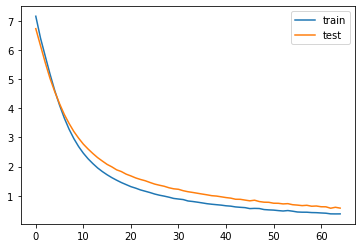

In [ ]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
model.save(f'/content/drive/MyDrive/Dataset TA/my_model_best')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_best/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset TA/my_model_best/assets
